# Executive Summary and Table of Content

## Executive Summary

In this analysis exercise we have explored database content that was related to Wicked Beverages

From the initial data pre-processing, we found that 29 customers did not make any purchases, and there was one product that did not exist in our product table (it has been assumed this is a one-off, Christmas purchase). We also found errors in approximately 47,000 transactions, with duplicated transaction IDs (these took place on different dates and across different customers, so were not bundle purchases).

I then explored at a high level the business performance, looking into metrics such :

number of customers, which seems to have slighlty dropped w.r.t 2020 values
revenue generated and average spend which have grown slightly w.r.t 2020 values
product popularity where we can clearly see 9 products are much more popular than the rest. Interestingly, these aren't the main revenue generators as this is spread evenly across most products.
I then conducted an RFM analysis, which showed that there were two types of customers: those who purchased frequently (55+ times) and those who didn't (between 0 and 10 times). The frequent shoppers generated over 80% of the total revenue, with an average spend of £470. Two products (pdx_0061 and pdx_0063) drove almost half of their purchases.

The non-frequent shoppers, who constituted over 80% of the customer base, only represented 18% of revenue. Their average order size was £21. Although the popular products among this group were similar to those for the frequent shoppers, there was less clear preference for specific products.

Among the non-frequent or low-value shoppers, the amount of time since their last purchase was inversely proportional to transaction volume and value. This was not an issue at all for frequent or high-value shoppers. This raises important questions about changes in pricing and potential reputational damage, amongst other potential issues.

Another study was also conducted on high-value vs. low-value customers, which showed a relatively high degree of overlap and similar results. However, it's important to ensure that the definition of "premium member" aligns with the company's goals.

I also briefly analyzed customers who were recorded as "premium" in the database. This showed a strong correlation between weekly alcohol consumption and transaction value/volume, as well as an inverse correlation between the time since their last purchase and transaction size/frequency. As mentioned before, it is important for the business to decide what kind of business they want to be. The current definition of 'premium member' is optimised for volume, however if Wicked Beverages wants to be driving value instead, then the 'premium member' definition could be slightly tweaked.

Finally, to continue this analysis it would be useful to define the desired characteristics of premium members.

## Table of Contents

0. Data Pre-Processing<br>
    0.1. Transaction Table<br>
    0.2. Customer Table<br>
    0.3. Product Table<br>
1. High Level View: Business Performance<br>
    1.1. Customers per Quarter<br>
        1.1.1. Number of Customers per Quarter
        1.1.2. Number of Unique Customers per Quarter
    1.2. Revenue per Quarter<br>
        1.2.1. Total Revenue per Quarter
        1.2.2. Average Revenue per Quarter
    1.3. Product Frequency per Quarter<br>
        1.3.1. Most Popular Product
        1.3.2. Most Revenue-Generating Product
2. Data Analysis: Recency, Frequency, Monetary (RFM) Analysis<br>
    2.1.Transaction Recency<br>
    2.2.Transaction Frequency<br>
        2.2.1. High Volume Transaction
            2.2.1.1. Numerical Exploration
            2.2.1.2. Categorical Exploration
            2.2.1.3. Further Categorical Exploration (Dummy Variables)
        2.2.2. Low Volume Transaction
            2.2.2.1. Numerical Exploration
            2.2.2.2. Categorical Exploration
            2.2.2.3. Further Categorical Exploration (Dummy Variables)
    2.3.Transaction Value<br>
        2.3.1. High Value Transaction
            2.3.1.1. Numerical Exploration
            2.3.1.2. Categorical Exploration
            2.3.1.3. Further Categorical Exploration (Dummy Variables)
        2.3.2. Low Value Transaction
            2.3.2.1. Numerical Exploration
            2.3.2.2. Categorical Exploration
            2.3.2.3. Further Categorical Exploration (Dummy Variables)
3. Premium Member Analysis<br>
4. Final Remarks<br>


# 0. Data Pre-Processing

This section will explore the data's structure, content and presentation with a view of outputting high quality data which can then be used to extract useful insights from.

We start by importing the right libraries so that we can process the data efficiently.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

Now we read in the data and print it out, to confirm it has been imported correctly.

In [2]:
# Read in data from a CSV file
df_transaction = pd.read_csv(r'C:\Users\ll128\Desktop\PY4E\elder\transaction_table.csv')
df_customer = pd.read_csv(r'C:\Users\ll128\Desktop\PY4E\elder\customer_table.csv')
df_product = pd.read_csv(r'C:\Users\ll128\Desktop\PY4E\elder\product_table.csv')

In [3]:
# Print the first 10 rows of data to get a sense of the values
df_transaction.head(3)

,customer_id,product_id,transaction_id,date,price
0,BQ0001572,pdx_B01,trx_36278B,07/08/2021,6.8
1,AQ00016254,pdx_0061,trx_9794A,11/01/2021,1.2
2,BQ00098197,pdx_0061,trx_75960A,27/12/2020,1.2


In [4]:
df_customer.head(3)

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie
0,PQ00027869,F,19,0,1,1,<£15K,1,med,0,0,1,4,0,1,0
1,ZQ00018804,M,55,1,1,0,£45-75K,1,med,1,1,0,1,0,0,1
2,ZQ0002937,F,26,0,1,1,£30-45K,2,high,0,0,1,15,1,1,0


In [5]:
df_product.head(3)

,product_id,product_level_1,product_level_2,product_level_3,product_level_4,type,product_quantity,size,price
0,pdx_0001,Wine,Red Wine,Cabernet Sauvignon,Fruity Ocean Cabernet Sauvignon,Bottle,1,75cl,15.0
1,pdx_0002,Wine,Red Wine,Cabernet Sauvignon,Carnivor Cabernet Sauvignon,Bottle,1,75cl,8.5
2,pdx_0003,Wine,Red Wine,Cabernet Sauvignon,WB Cabernet Sauvignon,Bottle,1,75cl,4.8


The data outputs look sensible and in line with what has been outlined in the dictionary table. So, we will now dive into the data in more detail to understand the types of data we are dealing with, any errors, null values, etc. 

## 0.1. Transaction Table

In [6]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160049 entries, 0 to 160048
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_id     160049 non-null  object 
 1   product_id      160049 non-null  object 
 2   transaction_id  160049 non-null  object 
 3   date            160049 non-null  object 
 4   price           160049 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.1+ MB


In [7]:
df_transaction.isnull().sum()

customer_id       0
product_id        0
transaction_id    0
date              0
price             0
dtype: int64

Starting with the transaction table we can see that everything is as expected except for the `date` column which should not be an `object` and should be a `datetime` type, instead. We can go ahead and change that.

In [8]:
df_transaction['date'] = pd.to_datetime(df_transaction['date'],format="%d/%m/%Y")
df_transaction['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 160049 entries, 0 to 160048
Series name: date
Non-Null Count   Dtype         
--------------   -----         
160049 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 MB


To ease date explorations, the `date` column will be broken down into 3 columns; `day`, `month` and `year`.

In [9]:
df_transaction['day'] = df_transaction['date'].dt.day
df_transaction['month'] = df_transaction['date'].dt.month
df_transaction['year'] = df_transaction['date'].dt.year

In [10]:
df_transaction.head(3)

,customer_id,product_id,transaction_id,date,price,day,month,year
0,BQ0001572,pdx_B01,trx_36278B,2021-08-07,6.8,7,8,2021
1,AQ00016254,pdx_0061,trx_9794A,2021-01-11,1.2,11,1,2021
2,BQ00098197,pdx_0061,trx_75960A,2020-12-27,1.2,27,12,2020


High level exploration of the numeric columns (looking to understand distribution, range and max/min values).

In [11]:
df_transaction.describe()

,price,day,month,year
count,160049.000000,160049.000000,160049.000000,160049.000000
mean,6.604411,15.723585,6.522278,2020.499647
std,9.816926,8.815444,3.455219,0.500001
min,1.200000,1.000000,1.000000,2020.000000
25%,2.000000,8.000000,4.000000,2020.000000
50%,3.000000,16.000000,7.000000,2020.000000
75%,8.500000,23.000000,10.000000,2021.000000
max,1500.000000,31.000000,12.000000,2021.000000


All values as expected, although the price column has an interesting maximum value, given the mean, percentiles and standard deviation. It will be worth exploring the distribution in more detail later.

We will now check for any anomalies in the data (this could include outliers, not expected values, etc).

In [12]:
# Firstly customer_id, we want these values to match those that are in the customer table
df_transaction['customer_id'].isin(df_customer['customer_id']).value_counts()

True    160049
Name: customer_id, dtype: int64

All transactions came from existing customers - good news.

In [13]:
df_customer['customer_id'].isin(df_transaction['customer_id']).value_counts()

True     7484
False      29
Name: customer_id, dtype: int64

We have 29 customers who did not purchase anything in the last 2 years. We can explore these in more detail, to understand what sort of customer profile no longer shops with us. If there is previous information about these customer's historic transactions, we can then further understand whether these are high value customers who have churned - problem - or low value / sporadic customers, which we might not need to worry about.

In [14]:
df_transaction['product_id'].isin(df_product['product_id']).value_counts()

True     160048
False         1
Name: product_id, dtype: int64

We can see that all `customer_id` in the transaction table are in the customer table. However, there is one `product_id` value in the transaction's table that does not exist in the product table. We will explore further.

In [15]:
comparison_bool = df_transaction['product_id'].isin(df_product['product_id'])
df_transaction[~comparison_bool]

,customer_id,product_id,transaction_id,date,price,day,month,year
100973,AQ0002380,pdx_AAAA,trx_A890000A,2021-12-18,1500.0,18,12,2021


Given that this is the most expensive product, and the transaction is before Christmas the assumption that this is a one-off is made.

We should also check whether there are any products that do not appear in the transaction list, as that would immediately signal that there could be a problem with that product, or simply that there is no longer any demand for it, and we might want to take it off our books.

In [16]:
df_product['product_id'].isin(df_transaction['product_id']).value_counts()

True    81
Name: product_id, dtype: int64

All products have been purchased at least once in the last 2 years - good news.

One final check, before moving on. The assumption has been made that transaction IDs are unique, as they happen per each purchase, therefore a check to confirm whether these values are indeed unique is made.

In [17]:
df_transaction['transaction_id'].nunique()

113442

In [18]:
non_unique = df_transaction['transaction_id'].duplicated()
non_unique_values = df_transaction.loc[non_unique, :]
print(non_unique_values)

       customer_id product_id transaction_id       date  price  day  month  \
584     ZQ00022446   pdx_0070     trx_17653B 2020-04-01   18.0    1      4   
768     PQ00012562   pdx_0060     trx_25977B 2020-04-01    1.8    1      4   
1240    PQ00096257   pdx_0060     trx_35751A 2021-09-17    1.8   17      9   
1244    AQ00056802   pdx_0055      trx_3744B 2021-06-20    1.8   20      6   
1265    ZQ00097663   pdx_0058     trx_23376A 2020-02-05    2.2    5      2   
...            ...        ...            ...        ...    ...  ...    ...   
160033  AQ00096921   pdx_0053     trx_24660A 2020-10-22    3.0   22     10   
160034  ZQ00091903   pdx_1146     trx_34985A 2020-10-08   17.0    8     10   
160035  BQ00016290   pdx_0057     trx_48971A 2021-09-09    2.0    9      9   
160040  ZQ00065521   pdx_0045     trx_50616A 2020-02-01    2.5    1      2   
160046  AQ00030044   pdx_0053     trx_37933A 2021-05-12    3.0   12      5   

        year  
584     2020  
768     2020  
1240    2021  
124

Dig a bit deeper to understand whether this error is related to a particular client(s), product or date.

In [19]:
non_unique_values.nunique()

customer_id        6634
product_id           81
transaction_id    35682
date                730
price                49
day                  31
month                12
year                  2
dtype: int64

From the above we can see that this error doesn't seem to be limited to a specific customer group, product or date. As these `transaction_ids` are related to different dates and different customers, as well as the points highlighted above, we can assume this is an error. Therefore, we will consider this an error and drop these values.

In [20]:
df_transaction_clean = df_transaction.drop_duplicates(subset='transaction_id')
df_transaction_clean['transaction_id'].info()

<class 'pandas.core.series.Series'>
Int64Index: 113442 entries, 0 to 160048
Series name: transaction_id
Non-Null Count   Dtype 
--------------   ----- 
113442 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


We can now move onto the next table; `df_customer`.

## 0.2. Customer Table

In [21]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7513 entries, 0 to 7512
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_id             7513 non-null   object
 1   gender                  7513 non-null   object
 2   age                     7513 non-null   int64 
 3   likes_wine              7513 non-null   int64 
 4   likes_beer              7513 non-null   int64 
 5   likes_spirits           7513 non-null   int64 
 6   income                  7513 non-null   object
 7   digital                 7513 non-null   int64 
 8   social_media_usage      7513 non-null   object
 9   number_of_children      7513 non-null   int64 
 10  alcohol_connoisseur     7513 non-null   int64 
 11  premium_member          7513 non-null   int64 
 12  alcohol_units_per_week  7513 non-null   int64 
 13  hobby_travel            7513 non-null   int64 
 14  hobby_watch_sports      7513 non-null   int64 
 15  hobb

In [22]:
df_customer.isnull().sum()

customer_id               0
gender                    0
age                       0
likes_wine                0
likes_beer                0
likes_spirits             0
income                    0
digital                   0
social_media_usage        0
number_of_children        0
alcohol_connoisseur       0
premium_member            0
alcohol_units_per_week    0
hobby_travel              0
hobby_watch_sports        0
hobby_foodie              0
dtype: int64

As income is a numeric range, we can convert this non-dichotomous categorical variable into a numerical one, which will help with correlation studies further down the line. An assumption of an even distribution over the range has been made, hence the avg value being what it is replaced with. Nevertheless, should this not be accurate it could be easily adapted to be more representative.

In [23]:
df_customer['income'] = df_customer['income'].replace(['<£15K', '£15-30K', '£30-45K','£45-75K','£75K+'], [int(7500),int(22500),int(37500),int(60000),int(97500)])

In [24]:
df_customer

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie
0,PQ00027869,F,19,0,1,1,7500,1,med,0,0,1,4,0,1,0
1,ZQ00018804,M,55,1,1,0,60000,1,med,1,1,0,1,0,0,1
2,ZQ0002937,F,26,0,1,1,37500,2,high,0,0,1,15,1,1,0
3,ZQ00016484,M,35,0,0,0,37500,2,low,2,1,1,27,1,1,1
4,PQ00080040,M,66,0,1,1,22500,5,low,1,1,0,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,XQ00056937,F,20,0,0,0,60000,2,med,0,0,0,8,0,1,1
7509,PQ0004245,U,43,0,0,0,37500,1,med,4,0,1,6,1,0,1
7510,XQ00093670,M,39,1,0,0,22500,2,low,0,0,1,16,0,1,0
7511,XQ00010354,F,37,1,0,1,22500,1,high,0,0,0,10,0,0,0


In [25]:
df_customer.describe()

,age,likes_wine,likes_beer,likes_spirits,income,digital,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie
count,7513.000000,7513.000000,7513.000000,7513.000000,7513.000000,7513.000000,7513.000000,7513.000000,7513.000000,7513.000000,7513.000000,7513.000000,7513.000000
mean,48.618262,0.394383,0.300546,0.398775,31502.395847,2.282311,1.210302,0.406495,0.174498,8.218688,0.175962,0.656861,0.334886
std,16.589935,0.488750,0.458526,0.489679,20011.762572,1.304546,1.119802,0.491212,0.379562,5.006302,0.380813,0.474789,0.471982
min,18.000000,0.000000,0.000000,0.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.000000,0.000000,22500.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
50%,47.000000,0.000000,0.000000,0.000000,22500.000000,2.000000,1.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000
75%,64.000000,1.000000,1.000000,1.000000,37500.000000,3.000000,2.000000,1.000000,0.000000,11.000000,0.000000,1.000000,1.000000
max,75.000000,1.000000,1.000000,1.000000,97500.000000,5.000000,4.000000,1.000000,1.000000,37.000000,1.000000,1.000000,1.000000


From the above we can see that the values are within the ranges expected. We can also glean some useful insights such as the minimum age (18), which means that this store deals to a location(s) where the legal age is 18, we also know the age of the eldest customer is 75. Similarly, we can see that on average customers prefer spirits, then wine and finally beer. Most customers' weekly alcohol intake varies between 5 and 11 units per week. Finally, about 18% of our customers are `premium_members`. More in depth analysis will be carried out in the analysis stage.

One last check, from the data dictionary we know that there are columns that should only be binary, others which have up to X entries and customer_id values should be unique. We check this below.

In [26]:
df_customer.nunique()

customer_id               7513
gender                       3
age                         58
likes_wine                   2
likes_beer                   2
likes_spirits                2
income                       5
digital                      5
social_media_usage           3
number_of_children           5
alcohol_connoisseur          2
premium_member               2
alcohol_units_per_week      36
hobby_travel                 2
hobby_watch_sports           2
hobby_foodie                 2
dtype: int64

Finally, as the above is all correct, we move on to evaluate the `product` table.

## 0.3. Product Table

In [27]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        81 non-null     object 
 1   product_level_1   81 non-null     object 
 2   product_level_2   81 non-null     object 
 3   product_level_3   81 non-null     object 
 4   product_level_4   81 non-null     object 
 5   type              81 non-null     object 
 6   product_quantity  81 non-null     int64  
 7   size              81 non-null     object 
 8   price             81 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 5.8+ KB


In [28]:
df_product.isnull().sum()

product_id          0
product_level_1     0
product_level_2     0
product_level_3     0
product_level_4     0
type                0
product_quantity    0
size                0
price               0
dtype: int64

In [29]:
df_product.describe()

,product_quantity,price
count,81.000000,81.000000
mean,2.148148,19.106173
std,3.282953,28.136601
min,1.000000,1.200000
25%,1.000000,6.000000
50%,1.000000,12.000000
75%,1.000000,20.000000
max,12.000000,200.000000


Important to note that `product_quantity` includes different measures (boxes, bottle, can, etc) which doesn't make it particularly useful when we use statistical representations to describe it. Nevertheless, it will be explored later to understand whether format has an impact on sales.

As before, we check whether the number of unique values across each category is in line with what we expected.

In [30]:
df_product.nunique()

product_id          81
product_level_1      3
product_level_2      5
product_level_3     24
product_level_4     71
type                 4
product_quantity     3
size                10
price               49
dtype: int64

# 1. High Level View: Business Performance

An exploratory analysis is a preliminary analysis of data that is performed to gain a better understanding of the data and to identify potential trends and relationships within the data. In the context of business performance, some important metrics to consider during an exploratory analysis may include:

- Number of customers: This metric provides an indication of the total number of customers that the business has acquired over a given period. It is important to track this metric because it provides a sense of the overall size of the business and its potential for growth.

- Active customers: This metric represents the number of customers who have made a purchase within a specific time period. It is an important metric because it provides a more accurate picture of the business's customer base and can help identify trends in customer engagement and loyalty.

- Sales generated: This metric represents the total revenue generated by the business over a given period. It is an important metric because it provides an indication of the business's overall financial performance and can be used to track the effectiveness of marketing and sales efforts.

- Average transaction value: This metric represents the average amount of money spent by a customer in a single transaction. It is important to track this metric because it provides insight into the value that the business is providing to its customers and can be used to identify opportunities to increase the value of each transaction.

- Frequency of purchase: This metric represents the average number of times that a customer makes a purchase over a given period. It is important to track this metric because it provides insight into customer behavior and can help identify trends in customer engagement and loyalty.

In addition to these metrics, there are several other metrics that may be important to consider during an exploratory analysis of business performance. Some examples of these metrics include:

- Profit (margin): This metric provides a more accurate representation of the financial success of a company, when compared to revenue. Revenues could grow yet profit could decline, and viceversa.

- Customer acquisition cost: This metric represents the average amount of money spent by the business to acquire a new customer. It is important to track this metric because it provides insight into the efficiency of the business's marketing and sales efforts and can help identify opportunities to improve these processes.

- Customer lifetime value: This metric represents the total amount of money that a customer is expected to spend on the business over the course of their relationship with the business. It is important to track this metric because it provides insight into the potential value of each customer and can help identify opportunities to increase customer loyalty and engagement.

- Customer satisfaction: This metric represents the degree to which customers are satisfied with their experience with the business. It is important to track this metric because it provides insight into the quality of the business's products and services and can help identify opportunities to improve customer satisfaction.

An important point to bear in mind, which we lack the data for here, is that it is critical to contextualise. This can be done comparing the above metrics against expected values and benchmarks. For example, revenue against expected revenue, customer growth vs expected customer growth, etc.

Overall, it is important to track a variety of metrics during an exploratory analysis of business performance in order to gain a complete understanding of the business and identify potential opportunities for improvement.

## 1.1. Customers per Quarter

### 1.1.1. Number of Customers Per Quarter

We now look into the total number of transactions, or total customers (including repeats) that took place in each quarter.

In [31]:
# Group by quarter and calculate customers per Q
df_transactions_quarter_count = df_transaction_clean.groupby(df_transaction_clean['date'].dt.to_period('Q'))['price'].size()

# Indexes are periods which are harder to search, convert to str
df_transactions_quarter_count.index = df_transactions_quarter_count.index.to_series().astype(str)

# Create separate variables for easier visualisation
df_transactions_2020_quarters_count = df_transactions_quarter_count[df_transactions_quarter_count.index.str.contains('2020')]
df_transactions_2021_quarters_count = df_transactions_quarter_count[df_transactions_quarter_count.index.str.contains('2021')]

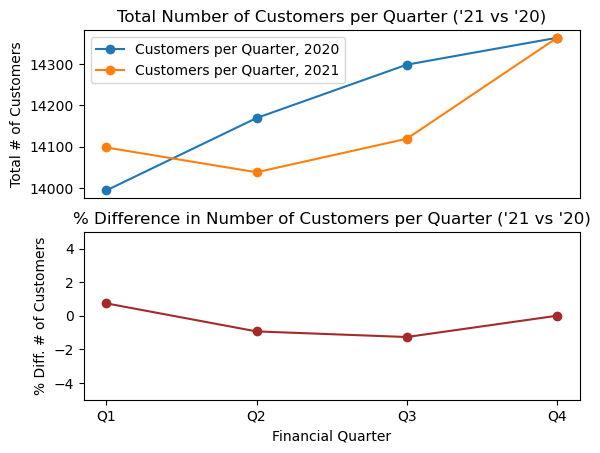

In [32]:
ax1 = plt.subplot(2, 1, 1)

df_transactions_2020_quarters_count.plot(marker='o')
df_transactions_2021_quarters_count.plot(marker='o')

plt.title("Total Number of Customers per Quarter ('21 vs '20)")
plt.ylabel("Total # of Customers")
plt.xlabel("")
plt.legend(['Customers per Quarter, 2020','Customers per Quarter, 2021'])

#Remove the x-ticks and labels as they do not add value
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.gca().xaxis.set_major_locator(plt.NullLocator())

ax2 = plt.subplot(2, 1, 2)
diff = (df_transactions_2021_quarters_count.values - df_transactions_2020_quarters_count.values) / df_transactions_2021_quarters_count.values * 100
plt.plot(['Q1','Q2','Q3','Q4'],diff, marker='o', color='brown')

plt.title("% Difference in Number of Customers per Quarter ('21 vs '20)")
plt.ylabel("% Diff. # of Customers")
plt.xlabel("Financial Quarter")
plt.ylim(-5,5)

plt.show()

We can clearly see that there is an overall decline in customers in 2021 vs 2020. This is not a good sign for business. Further analysis should be conducted to understand the root cause. Metrics that could be of interest here include customer satisfaction (e.g. NPS score), structural changes (e.g. product discontinuation, changes in marketing, etc.).

Other external factors to be considered include macroeconomic changes (e.g. reduction in disposable income, forecasted recessions, etc), new players entering the market,  changes to regulation/legislation, research published about benefits/issues with certain drinks etc.

### 1.1.2. Number of Unique Customers Per Quarter

We will now look at number of unique customers. It is clear there is an overall (small) decline, but looking at the number of unique customers can tell us whether this is a reduction in frequency (which could signal tough financial times) or whether there is a decrease in popularity, which could be a more structural issue.

In [33]:
# Group by quarter and calculate number of unique customers per Q
df_transactions_quarter_unique_count = df_transaction_clean.groupby(df_transaction_clean['date'].dt.to_period('Q'))['customer_id'].nunique()

# Indexes are periods which are harder to search, convert to str
df_transactions_quarter_unique_count.index = df_transactions_quarter_unique_count.index.to_series().astype(str)

# Create separate variables for easier visualisation
df_transactions_2020_quarters_unique_count = df_transactions_quarter_unique_count[df_transactions_quarter_unique_count.index.str.contains('2020')]
df_transactions_2021_quarters_unique_count = df_transactions_quarter_unique_count[df_transactions_quarter_unique_count.index.str.contains('2021')]

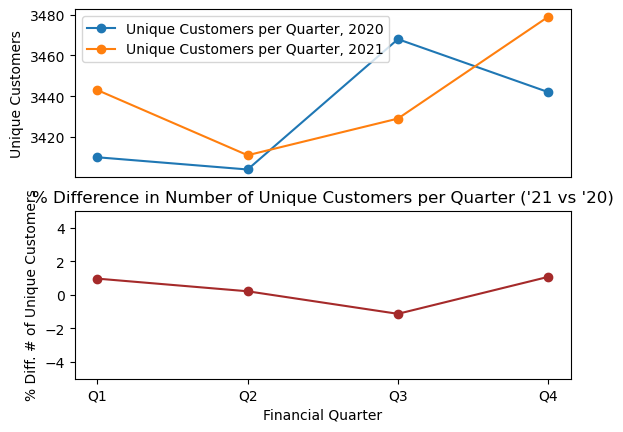

In [34]:
ax1 = plt.subplot(2, 1, 1)

df_transactions_2020_quarters_unique_count.plot(marker='o')
df_transactions_2021_quarters_unique_count.plot(marker='o')

plt.xlabel("")
plt.ylabel("Unique Customers")
plt.legend(['Unique Customers per Quarter, 2020','Unique Customers per Quarter, 2021'])

#Remove the x-ticks and labels as they do not add value
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.gca().xaxis.set_major_locator(plt.NullLocator())

ax2 = plt.subplot(2, 1, 2)
diff = (df_transactions_2021_quarters_unique_count.values - df_transactions_2020_quarters_unique_count.values) / df_transactions_2021_quarters_unique_count.values * 100
plt.plot(['Q1','Q2','Q3','Q4'],diff, marker='o', color='brown')

plt.title("% Difference in Number of Unique Customers per Quarter ('21 vs '20)")
plt.ylabel("% Diff. # of Unique Customers")
plt.xlabel("Financial Quarter")
plt.ylim(-5,5)

plt.show()

Interestingly, here we can see that overall there does not seem to be a huge amount of change. This could lead us to explore whether there are macro-factors that are affecting our sales, or new players who are taking a part of our market share. Similarly, customers could be losing enthusiasm for the brand - amongst a whole host of other reasons, related to Wicked Beverages, that are decreasing sales.
- Recommendation: Quick landscape analysis, to gauge whether this is ocurring across the industry. This could signal a general slow-down or could point towards structural issues that are impeding growth.

## 1.2. Revenue Per Quarter

### 1.2.1. Total Revenue Per Quarter

In this section, to better understand business performance, we will explore the revenue per quarter. This will then be compared across the years.

In [35]:
# Group by quarter and calculate revenue per Q
df_transactions_quarter = df_transaction_clean.groupby(df_transaction_clean['date'].dt.to_period('Q'))['price'].sum()

# Indexes are periods which are harder to search, convert to str
df_transactions_quarter.index = df_transactions_quarter.index.to_series().astype(str)

# Create separate variables for easier visualisation
df_transactions_2020_quarters = df_transactions_quarter[df_transactions_quarter.index.str.contains('2020')]
df_transactions_2021_quarters = df_transactions_quarter[df_transactions_quarter.index.str.contains('2021')]

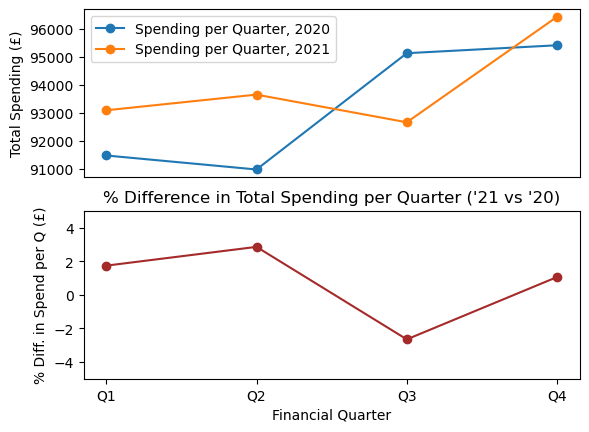

In [36]:
ax1 = plt.subplot(2, 1, 1)

df_transactions_2020_quarters.plot(marker='o')
df_transactions_2021_quarters.plot(marker='o')

plt.xlabel("")
plt.ylabel("Total Spending (£)")
plt.legend(['Spending per Quarter, 2020','Spending per Quarter, 2021'])

#Remove the x-ticks and labels as they do not add value
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.gca().xaxis.set_major_locator(plt.NullLocator())

ax2 = plt.subplot(2, 1, 2)
diff = (df_transactions_2021_quarters.values - df_transactions_2020_quarters.values) / df_transactions_2021_quarters.values*100
plt.plot(['Q1','Q2','Q3','Q4'],diff, marker='o', color='brown')

plt.title("% Difference in Total Spending per Quarter ('21 vs '20)")
plt.ylabel("% Diff. in Spend per Q (£)")
plt.xlabel("Financial Quarter")
plt.ylim(-5,5)

plt.show()

Despite the number of transactions decreasing, interestingly we can see that the total spending per quarter mostly goes up. The next logical point to explore would be to understand what the average spend is and how this is changing.

### 1.2.2. Average Revenue Per Quarter

Now to explore the average revenue generated.

In [37]:
# Group by quarter and calculate avg revenue per Q
df_transactions_quarter_avg = df_transaction_clean.groupby(df_transaction_clean['date'].dt.to_period('Q'))['price'].mean()

# Indexes are periods which are harder to search, convert to str
df_transactions_quarter_avg.index = df_transactions_quarter_avg.index.to_series().astype(str)

# Create separate variables for easier visualisation
df_transactions_2020_quarters = df_transactions_quarter_avg[df_transactions_quarter_avg.index.str.contains('2020')]
df_transactions_2021_quarters = df_transactions_quarter_avg[df_transactions_quarter_avg.index.str.contains('2021')]

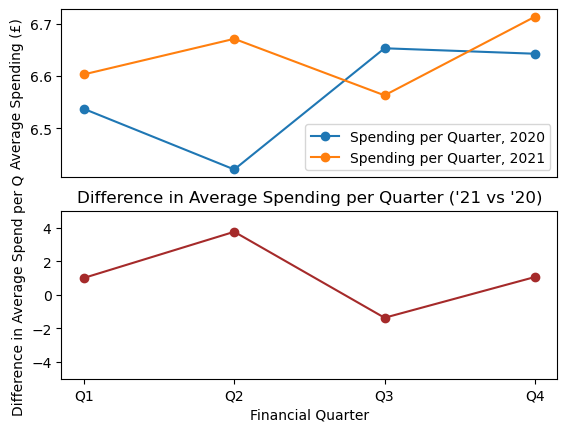

In [38]:
ax1 = plt.subplot(2, 1, 1)

df_transactions_2020_quarters.plot(marker='o')
df_transactions_2021_quarters.plot(marker='o')

plt.xlabel("")
plt.ylabel("Average Spending (£)")
plt.legend(['Spending per Quarter, 2020','Spending per Quarter, 2021'])

#Remove the x-ticks and labels as they do not add value
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.gca().xaxis.set_major_locator(plt.NullLocator())

ax2 = plt.subplot(2, 1, 2)
diff = (df_transactions_2021_quarters.values - df_transactions_2020_quarters.values) / df_transactions_2021_quarters.values *100
plt.plot(['Q1','Q2','Q3','Q4'],diff, marker='o', color='brown')

plt.title("Difference in Average Spending per Quarter ('21 vs '20)")
plt.ylabel("Difference in Average Spend per Q")
plt.xlabel("Financial Quarter")
plt.ylim(-5,5)

plt.show()

The average spending, per quarter, is slightly higher than the previous year. This somewhat explains why even though there are decreasing number of customers, we aren't seeing noticeable drops in revenue.

Based on this, it would be interesting to understand what products drive this revenue and see whether anything has changed in this space.


## 1.3. Product Frequency per Quarter

### 1.3.1. Most Popular Products

It is important to understand what our most popular products are. This will help understand whether 1) they drive most revenue, 2) they do not drive most revenue, but then lead customers to more revenue-generating products or 3) they just happen to become fashionable and we need to create a more resilient approach to attracting new customers.

In [39]:
# Variable allows us to play with how many 'most popular' products we pick, per quarter, in terms of the
# amount of times they are purchased
variable = 8

product_group = df_transaction_clean.groupby([df_transaction_clean['date'].dt.to_period('Q'),'product_id']).size().reset_index()
temp = product_group.sort_values(['date',0],ascending=False).groupby('date')

top_x_prods = temp[0].nlargest(variable).reset_index()
filter_index = top_x_prods['level_1']

filtered_df = product_group[product_group.index.isin(filter_index)]
#print(filtered_df)


We will now optimise optimise the `variable` value, to ensure we are able to include the most popular products before the number of times these are purchased drops off into lower, less significant values.

In [40]:
# Indexes are periods which are harder to search, convert to str
filtered_df.index = filtered_df['date'].astype(str)

# Create separate variables for easier visualisation
top_x_prod_2020 = filtered_df[filtered_df.index.str.contains('2020')]
top_x_prod_2021 = filtered_df[filtered_df.index.str.contains('2021')]

top_x_prod_2020 = top_x_prod_2020.set_index(['date','product_id'])
top_x_prod_2021 = top_x_prod_2021.set_index(['date','product_id'])

In [41]:
# Helpful to visualise peaks and drops in product popularity, to refine the 'variable' above
# and settle on a number that gives us an overview of the top most popular products

#top_x_prod_2020.plot(kind='bar')
#top_x_prod_2021.plot(kind='bar')

From the above optimisation process, we can see that the value for `variable` where we capture the most popular products across the four quarters lies at 9. This is 9 products (~10% of product mix) stand out as significantly more popular than others (seeing number of times purchased per quarter dropping by over 50%).

Based on this, we will now explore these 9 products and understand whether popularity has changed from one year to another, as this might give as an indication regarding changes that might have taken place. This could be helpful in further diagnosing why revenue has dropped, for example. It also allows us to hone in on the most popular products, to ensure we focus on these to drive furthe traffic and new customers.

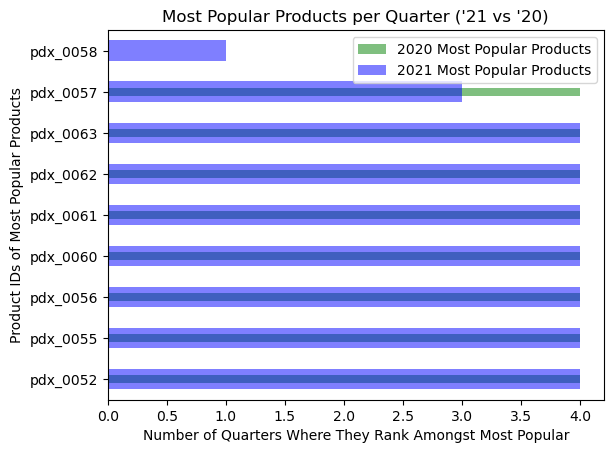

In [42]:
top_x_prod_2020.reset_index()['product_id'].value_counts().plot(kind='barh',color='g',alpha=0.5,width=0.2)

top_x_prod_2021.reset_index()['product_id'].value_counts().plot(kind='barh',color='b',alpha=0.5,width=0.5)

plt.legend(['2020 Most Popular Products','2021 Most Popular Products'])

plt.title("Most Popular Products per Quarter ('21 vs '20)")
plt.ylabel("Product IDs of Most Popular Products")
plt.xlabel("Number of Quarters Where They Rank Amongst Most Popular")

plt.show()

Interestingly, the most popular products have remained rather consistent, with a little bit of drop in popularity when it comes to `pdx_0057` and a new contender in the race `pdx_0058`.

Now, it would be helpful to understand if this popularity is tied to revenue-generation.

### 1.3.2. Most Revenue-Generating Products

In [43]:
# Variable allows us to play with how many 'most revenue-driving' products we pick, per quarter, in terms of the
# amount of times they are purchased
variable = 10

# Group transactions by quarter and product_id and calculate rev generated by each
product_group = df_transaction_clean.groupby([df_transaction_clean['date'].dt.to_period('Q'),'product_id'])['price'].sum().reset_index()

# Sort values based on date and price and re-group by date
temp = product_group.sort_values(['date','price'],ascending=False).groupby('date')

# Find the `variable` most reveneu generating products, subject to how many we want to find
top_x_prods = temp['price'].nlargest(variable).reset_index()
#top_x_prods = temp['price'].nsmallest(variable).reset_index()


# Find indexes of those most reveneu generating products
filter_index = top_x_prods['level_1']

filtered_df = product_group[product_group.index.isin(filter_index)]
print(filtered_df)

       date product_id   price
0    2020Q1   pdx_0001  1290.0
13   2020Q1   pdx_0014  1304.0
17   2020Q1   pdx_0018  1275.0
19   2020Q1   pdx_0020  1252.5
20   2020Q1   pdx_0021  1272.0
..      ...        ...     ...
626  2021Q4   pdx_0072  1533.0
631  2021Q4   pdx_0078  1380.0
632  2021Q4   pdx_0079  1600.0
639  2021Q4    pdx_A22  1517.0
645  2021Q4   pdx_AAAA  1500.0

[80 rows x 3 columns]


In [44]:
# Indexes are periods which are harder to search, convert to str
filtered_df.index = filtered_df['date'].astype(str)

# Create separate variables for easier visualisation
top_x_prod_2020_rev = filtered_df[filtered_df.index.str.contains('2020')]
top_x_prod_2021_rev = filtered_df[filtered_df.index.str.contains('2021')]

top_x_prod_2020_rev = top_x_prod_2020_rev.set_index(['date','product_id'])
top_x_prod_2021_rev = top_x_prod_2021_rev.set_index(['date','product_id'])

<AxesSubplot:xlabel='date,product_id'>

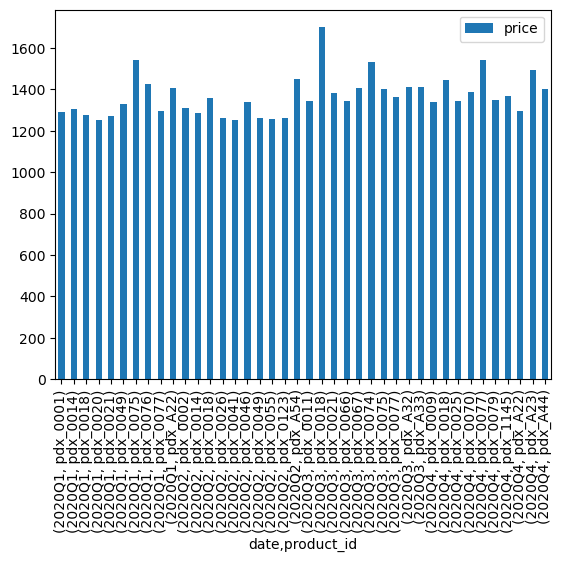

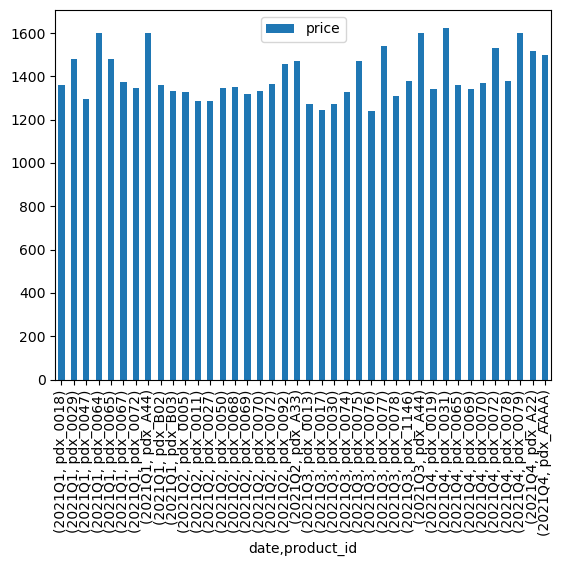

In [45]:
# Helpful to visualise peaks and drops in product popularity, to refine the 'variable' above
# and settle on a number that gives us an overview of the top most popular products

top_x_prod_2020_rev.plot(kind='bar')
top_x_prod_2021_rev.plot(kind='bar')

Interestingly, unlike popularity, product-driven revenue is rather uniform. There does not seem to be a clear cut off point, therefore it is likely that there will not be a clear winner when it comes to leading product-driven revenue across the quarters.

Nevertheless, we will focus on the top 10 most popular per quarter, to maintain the focus on those which drive more revenue - albeit a small difference.

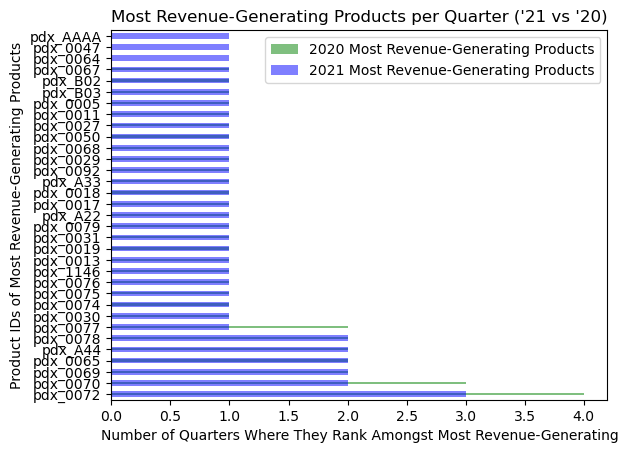

In [46]:
top_x_prod_2020_rev.reset_index()['product_id'].value_counts().plot(kind='barh',color='g',alpha=0.5,width=0.2)

top_x_prod_2021_rev.reset_index()['product_id'].value_counts().plot(kind='barh',color='b',alpha=0.5,width=0.5)

plt.legend(['2020 Most Revenue-Generating Products','2021 Most Revenue-Generating Products'])

plt.title("Most Revenue-Generating Products per Quarter ('21 vs '20)")
plt.ylabel("Product IDs of Most Revenue-Generating Products")
plt.xlabel("Number of Quarters Where They Rank Amongst Most Revenue-Generating")

plt.show()

It is clear that there are only 5 (6 for 2020) products (those with ranks of 2 quarters or above) that are consistently high-revenue generators. When compared to the previous year, these have lost some degree of consistency.

When we compare these values to the most popular products, in the previous section, we can see that there is no overlap. This is not necessarily a problem, but it will mean that we should dive deeper into what makes the few products that repeatedly come at the top of the popularity list popular. Similarly, amongst a sea of products that drive similar amounts of revenue, what makes those that drive more revenue, more consistently unique.

One final sense check, which helps understand whether there might be an inherent relationship between the last two properties explored - popularity and revenue-generated - will be conducted. Here we will plot revenue generated by product line alongside number of units sold (popularity) to understand whether these might be related, which could impact the interpretation of the above results.

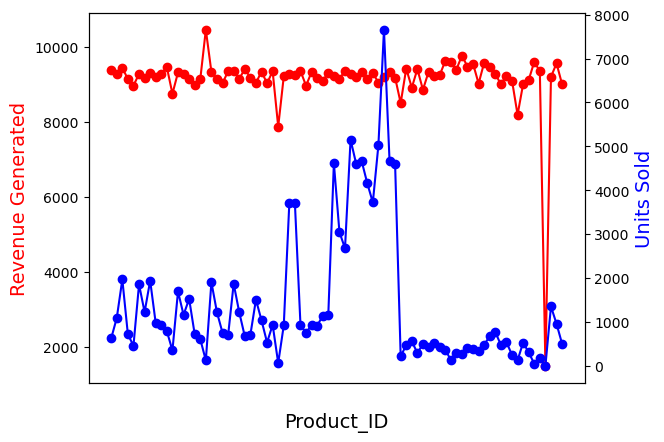

In [47]:
prod_group_total = df_transaction_clean.groupby('product_id')['price'].sum()
prod_group_total_num = df_transaction_clean.groupby('product_id').size()

fig,ax = plt.subplots()

ax.plot(prod_group_total.index,prod_group_total,color="r", marker="o")
ax.set_xlabel("Product_ID", fontsize = 14)
ax.set_ylabel("Revenue Generated",color="r",fontsize=14)
ax.tick_params(axis='x', colors='w')    

ax2=ax.twinx()

ax2.plot(prod_group_total_num.index, prod_group_total_num,color="b",marker="o")
ax2.set_ylabel("Units Sold",color="b",fontsize=14)
ax2.tick_params(axis='x', colors='w')    

plt.show()

As we can see from the above, there is no clear relationship here and thus our initial analysis is correctly interpreting the data.

Having now carried out an initial exploration of the data, we will dive into some more complex questions to better understand the state of the business and what the transaction history can tell us about our customers.

# 2. Data Exploration: Recency, Frequency, Monetary (RFM) Analysis

Recency, frequency, and monetary (RFM) analysis is a tool used to identify the value of a customer to a business. The analysis is based on three key metrics: recency, which refers to how recently a customer made a purchase; frequency, which refers to how often a customer makes a purchase; and monetary, which refers to how much money a customer spends on purchases. By analyzing these three metrics, businesses can better understand their customer base and target their marketing efforts to retain and increase the value of their most valuable customers.

Let's start exploring the data in a bit more detail. We know that one of the questions our team has is how to identify characteristics of a 'premium' customer. 
We actually have a `premium_member` column in our customer table. Before we dive into exploring what are the common traits here, I would like to validate the team's initial assumption:
- Premium Customers = Those who transact most frequently

I would also like to throw another question into the mix. Do we want to define premium members as those who transact frequently or those who drive most revenue?
 
We will answer these questions below.

## 2.1. Transaction Recency

We are now going to look into the spread of these transactions over time.

Here we are going to calculate the last time each customer has made a purchase and we will then calculate the time difference between today and that date. This will give us our recency of purchase.

In [48]:
dates = df_transaction_clean.groupby('customer_id')['date'].max()

from datetime import datetime, timedelta
temp_dict_cust = {}
today = datetime.now().date()
for index, value in dates.iteritems():
    value = value.to_pydatetime().date()
    temp_dict_cust[index] = (today - value).days

temp_df_cust = pd.DataFrame(temp_dict_cust.values(),index=temp_dict_cust.keys())

temp_df_cust = temp_df_cust.rename(columns={0: 'recency'}) 

df_customer_extra = df_customer.merge(temp_df_cust,how='left',left_on='customer_id',right_on=temp_df_cust.index,sort=True)
df_customer_extra

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie,recency
0,AQ00010075,U,68,0,0,0,37500,4,low,1,1,0,8,0,0,0,522.0
1,AQ00010112,M,36,1,1,1,37500,3,low,2,1,0,7,1,1,0,406.0
2,AQ00010221,F,42,0,0,0,22500,3,high,1,1,0,6,0,0,0,991.0
3,AQ00010222,F,68,1,0,0,7500,4,low,1,1,0,9,0,1,0,630.0
4,AQ0001024,M,71,0,0,0,7500,3,low,1,1,0,15,0,1,0,383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,ZQ00099659,M,46,0,0,0,37500,1,med,0,0,0,9,0,1,0,346.0
7509,ZQ00099711,M,38,0,0,1,37500,1,low,1,1,0,4,0,1,0,535.0
7510,ZQ00099869,F,41,1,0,0,22500,2,low,1,0,0,6,0,1,1,412.0
7511,ZQ0009990,M,60,1,0,0,37500,3,low,1,1,0,1,0,0,1,427.0


We will also look into when were products last purchased.

In [49]:
df_transaction_clean.groupby('product_id')['date'].max().sort_values()

product_id
pdx_A44    2021-11-26
pdx_0031   2021-12-13
pdx_AAAA   2021-12-18
pdx_0017   2021-12-27
pdx_A54    2021-12-28
              ...    
pdx_0029   2021-12-31
pdx_0028   2021-12-31
pdx_0027   2021-12-31
pdx_0045   2021-12-31
pdx_B03    2021-12-31
Name: date, Length: 82, dtype: datetime64[ns]

It is clear that all products have been purchased, at least once, recently. Therefore, the potential avenue of whether a product no longer was being purchased is out of consideration. An in depth analysis of how often each product is purchased is suggested.

## 2.2. Transaction Frequency (Volume)

In this section we will evaluate transaction frequency.

In order to keep track of what products are purchased, we will need to find the most popular product per customer, which will in turn help us find the most popular product(s) per category which we will soon define.

In [50]:
#Find which products are most purchased by each customer (ie. their favourite product)
fav_product = df_transaction_clean.groupby('customer_id').product_id.apply(lambda x: x.mode().max())

In [51]:
# Add each customer's favourite product to the customers category table
df_customer_extra = df_customer_extra.merge(fav_product,how='left',left_on='customer_id',right_on=fav_product.index,sort=True)
df_customer_extra.rename(columns={"product_id": "fav_product_id"},inplace=True)
df_customer_extra

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie,recency,fav_product_id
0,AQ00010075,U,68,0,0,0,37500,4,low,1,1,0,8,0,0,0,522.0,pdx_0008
1,AQ00010112,M,36,1,1,1,37500,3,low,2,1,0,7,1,1,0,406.0,pdx_0075
2,AQ00010221,F,42,0,0,0,22500,3,high,1,1,0,6,0,0,0,991.0,pdx_B02
3,AQ00010222,F,68,1,0,0,7500,4,low,1,1,0,9,0,1,0,630.0,pdx_0060
4,AQ0001024,M,71,0,0,0,7500,3,low,1,1,0,15,0,1,0,383.0,pdx_A33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,ZQ00099659,M,46,0,0,0,37500,1,med,0,0,0,9,0,1,0,346.0,pdx_B02
7509,ZQ00099711,M,38,0,0,1,37500,1,low,1,1,0,4,0,1,0,535.0,pdx_0058
7510,ZQ00099869,F,41,1,0,0,22500,2,low,1,0,0,6,0,1,1,412.0,pdx_0058
7511,ZQ0009990,M,60,1,0,0,37500,3,low,1,1,0,1,0,0,1,427.0,pdx_0059


### 2.2.1. High Transaction Volume

In [52]:
# Shows who the unique customers who have purchased are as well as a sense check of these numbers (to ensure not larger than number of customers)
unique_customer_purchased = df_transaction_clean['customer_id'].unique()
df_transaction_clean['customer_id'].nunique()

7274

(array([5.609e+03, 3.540e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 5.000e+00, 2.800e+01, 9.400e+01, 2.270e+02,
        2.940e+02, 3.100e+02, 2.170e+02, 9.500e+01, 2.700e+01, 1.000e+01,
        3.000e+00, 1.000e+00]),
 array([  1.  ,   6.35,  11.7 ,  17.05,  22.4 ,  27.75,  33.1 ,  38.45,
         43.8 ,  49.15,  54.5 ,  59.85,  65.2 ,  70.55,  75.9 ,  81.25,
         86.6 ,  91.95,  97.3 , 102.65, 108.  ]),
 <BarContainer object of 20 artists>)

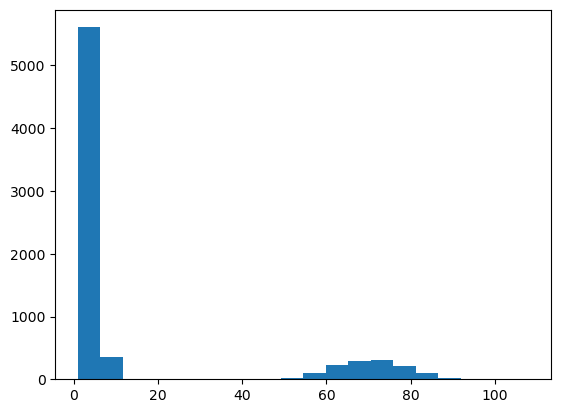

In [53]:
plt.hist(df_transaction_clean.groupby('customer_id').size(),bins=20)

From the above bar chart, we can see that there are clearly two groups of customers. Those who purchase frequently (between 55 and 100 times over the two year period) and those who do not (between 0 and 10 times over that same period). We will now find out who these customers are under the `frequent_customers` variable.

In [54]:
df_transaction_clean.groupby('customer_id').size()

customer_id
AQ00010075    1
AQ00010112    5
AQ00010221    2
AQ00010222    2
AQ0001024     6
             ..
ZQ00099659    3
ZQ00099711    1
ZQ00099869    4
ZQ0009990     2
ZQ0009991     4
Length: 7274, dtype: int64

In [55]:
# Update customer's table with transaction frequency
series = df_transaction_clean.groupby('customer_id').size()

df_customer_extra = df_customer_extra.merge(series.rename('transaction_volume',inplace=False),how='left',left_on='customer_id',right_on=series.index,sort=True)
df_customer_extra

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie,recency,fav_product_id,transaction_volume
0,AQ00010075,U,68,0,0,0,37500,4,low,1,1,0,8,0,0,0,522.0,pdx_0008,1.0
1,AQ00010112,M,36,1,1,1,37500,3,low,2,1,0,7,1,1,0,406.0,pdx_0075,5.0
2,AQ00010221,F,42,0,0,0,22500,3,high,1,1,0,6,0,0,0,991.0,pdx_B02,2.0
3,AQ00010222,F,68,1,0,0,7500,4,low,1,1,0,9,0,1,0,630.0,pdx_0060,2.0
4,AQ0001024,M,71,0,0,0,7500,3,low,1,1,0,15,0,1,0,383.0,pdx_A33,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,ZQ00099659,M,46,0,0,0,37500,1,med,0,0,0,9,0,1,0,346.0,pdx_B02,3.0
7509,ZQ00099711,M,38,0,0,1,37500,1,low,1,1,0,4,0,1,0,535.0,pdx_0058,1.0
7510,ZQ00099869,F,41,1,0,0,22500,2,low,1,0,0,6,0,1,1,412.0,pdx_0058,4.0
7511,ZQ0009990,M,60,1,0,0,37500,3,low,1,1,0,1,0,0,1,427.0,pdx_0059,2.0


Now that we have merged the transaction volume into the customer table, we first check whether there are any null values (i.e. those who have not made transactions). We would expect a value of 239, as the length of the code (2 cells above this one) is 7242 and we know that the full customer list is 7513, hence 239.

In [56]:
df_customer_extra['transaction_volume'].isnull().sum()

239

This is the value expected, therefore we will fill these entries with '0' as this represents 0 purchases in the time period examined.

In [57]:
df_customer_extra['transaction_volume'] = df_customer_extra['transaction_volume'].fillna(0)
df_customer_extra['transaction_volume'].isnull().any()

False

We have successfully replaced `NaN` values which appeared as a result of no transactions with '0' values, which better represent users who have not participated in transactions.

We will now look explore the transaction value for each user - this will help further down the line when we evaluate whether the definition of premium customers is accurate, as well as establishing traits for both frequent spenders as well as high value spenders.

In [58]:
df_customer_extra[df_customer_extra['transaction_volume'] > 55]

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie,recency,fav_product_id,transaction_volume
24,AQ00011219,F,20,0,0,0,22500,1,high,0,0,1,16,0,1,1,350.0,pdx_0061,72.0
26,AQ00011427,F,39,0,0,0,22500,1,low,2,0,1,26,0,1,0,346.0,pdx_0063,81.0
34,AQ00012128,F,41,1,1,0,37500,2,low,1,1,1,7,0,0,0,347.0,pdx_0015,62.0
46,AQ00012561,M,44,0,0,0,22500,4,med,1,0,1,6,0,1,1,366.0,pdx_0061,68.0
54,AQ0001311,M,46,0,0,1,22500,3,low,1,1,1,19,0,0,0,349.0,pdx_0061,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7486,ZQ0009865,F,41,0,1,1,22500,1,low,1,0,1,17,0,1,0,352.0,pdx_0063,73.0
7487,ZQ00098661,F,62,1,0,0,37500,2,low,2,0,1,17,0,1,0,363.0,pdx_0060,57.0
7497,ZQ0009925,M,50,0,0,0,60000,2,low,3,1,1,17,0,1,0,366.0,pdx_0045,62.0
7504,ZQ0009950,M,51,1,0,0,37500,1,med,0,1,1,12,0,1,1,355.0,pdx_0061,64.0


In [59]:
# We now have a list of those customers who most frequently purchase from our store
frequent_customers = df_customer_extra['customer_id'][df_customer_extra['transaction_volume'] > 55]
frequent_customers_df = df_customer_extra[df_customer_extra['transaction_volume'] > 55]

In [60]:
frequent_customers_df.nunique()

customer_id               1266
gender                       3
age                         58
likes_wine                   2
likes_beer                   2
likes_spirits                2
income                       5
digital                      5
social_media_usage           3
number_of_children           5
alcohol_connoisseur          2
premium_member               1
alcohol_units_per_week      36
hobby_travel                 2
hobby_watch_sports           2
hobby_foodie                 2
recency                     54
fav_product_id              27
transaction_volume          43
dtype: int64

Before moving on to the data exploration, it would be useful to understand what this group represents in terms of revenue generated, lifetime value of each customer as well as what percentage of revenue it generates.

In [61]:
print('This customer group generates: £',df_transaction_clean[df_transaction_clean['customer_id'].isin(frequent_customers)]['price'].sum())
print('An average (per customer): £',df_transaction_clean[df_transaction_clean['customer_id'].isin(frequent_customers)]['price'].sum()/len(frequent_customers))
print('This represents % of the total revenue:',100*df_transaction_clean[df_transaction_clean['customer_id'].isin(frequent_customers)]['price'].sum()/df_transaction_clean['price'].sum())


This customer group generates: £ 596294.8
An average (per customer): £ 471.00695102685626
This represents % of the total revenue: 79.63329103904655


#### 2.2.1.1. Numerical Data Exploration

Let's explore whether we can identify any correlation patterns between our characteristics and those customers with high transaction frequency. The easiest approach here is to create a correlation heat map. As we can see from above, we only have premium members in our `frequent_customers` dataframe, therefore we will exclude this column from the correlation matrix.

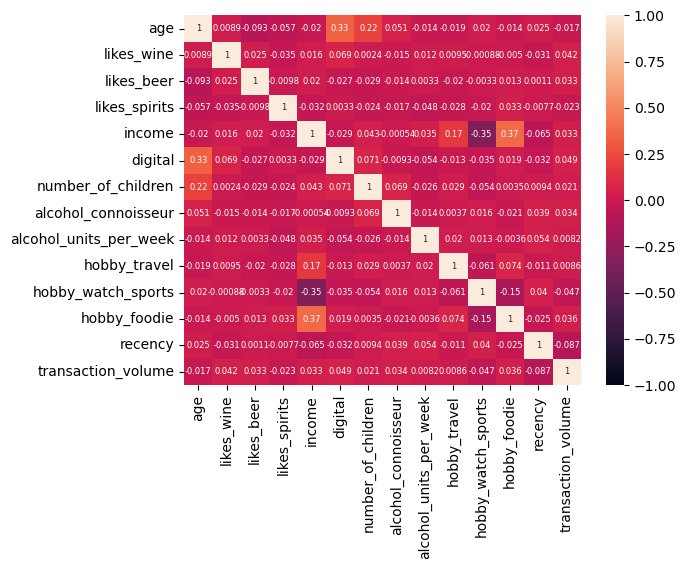

In [62]:
corr_matrix_frequent = frequent_customers_df.drop(columns=['premium_member']).corr()
sns.heatmap(corr_matrix_frequent,vmin=-1, vmax=1, annot=True,annot_kws={"size": 6});

Beyond the fact that the high transaction volume customers are all premium members, there is very little correlation between other characteristics. Other avenues will be explored.

#### 2.2.1.2. Categorical Data Exploration

We have evaluated numerical columns, now we should evaluate those that are categorical. This exploration will be conducted using boxplots as they give a good understanding of the full dataset.

<AxesSubplot:title={'center':'% of occurrences of each category'}, xlabel='Category', ylabel='% of occurrences'>

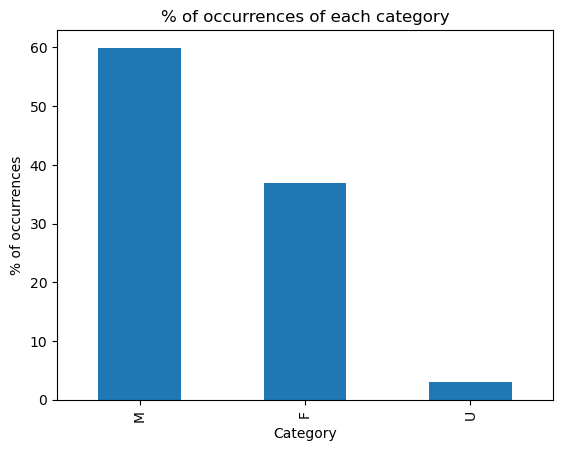

In [63]:
total_count = frequent_customers_df['gender'].value_counts().sum()
category_proportions = 100*frequent_customers_df['gender'].value_counts() / total_count
category_proportions.plot.bar(title='% of occurrences of each category',
                                       xlabel='Category',
                                       ylabel='% of occurrences')

<AxesSubplot:title={'center':'% of occurrences of each category'}, xlabel='Category', ylabel='% of occurrences'>

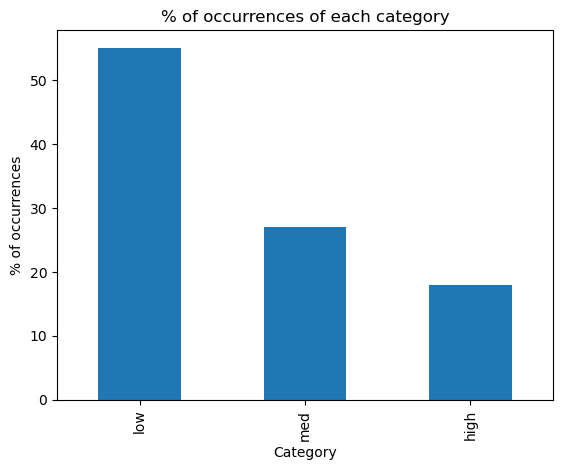

In [64]:
total_count = frequent_customers_df['social_media_usage'].value_counts().sum()
category_proportions = 100*frequent_customers_df['social_media_usage'].value_counts() / total_count
category_proportions.plot.bar(title='% of occurrences of each category',xlabel='Category',ylabel='% of occurrences')

For the above we can see that in this category there is a strong presence amongst male clients, with a smaller representation from female and a small (<5%) representation from those who did not disclose their gender. In terms of social media usage, it is clear that those with high usage are the minority, with just over 20% of the population identifying in that category. This is closely followed by medium usage, with around 25% and finally those with low social media usage just over 50%.

Finally, here we will investigate which products are most purchased by this group. This will give us an indication of the most purchased products as well as how much % of transactions they represent amongst that group's transaction history. Here I have defined favourite as those which either constitue 75% of all transactions or are up to 8 products (this is roughly 10% of all product offering)

In [65]:
#Total amount of purchases across all product categories produced by this group
total_purchases_frequent_customers = frequent_customers_df['fav_product_id'].value_counts().sum()

fav_product_frequent_customers = frequent_customers_df['fav_product_id'].value_counts()

# Up to a maximum of 8 products, calculate which product IDs are the favourite amongst this group
# Favourite is defined as between those products, they account for more than 75% of purchases for 
# that group. 
for i in range(1,9):
    print('Product ID:',fav_product_frequent_customers.index[i-1],
          '&&& % of Total purchases:',fav_product_frequent_customers[i-1]
          /total_purchases_frequent_customers*100)
    
    if fav_product_frequent_customers[0:i].sum()/total_purchases_frequent_customers > 0.75:
        delimitator = i
        break
        
indexes_frequent = fav_product_frequent_customers.index[0:delimitator]



Product ID: pdx_0061 &&& % of Total purchases: 37.519747235387044
Product ID: pdx_0063 &&& % of Total purchases: 10.347551342812006
Product ID: pdx_0060 &&& % of Total purchases: 9.24170616113744
Product ID: pdx_0062 &&& % of Total purchases: 9.004739336492891
Product ID: pdx_0055 &&& % of Total purchases: 6.9510268562401265
Product ID: pdx_0057 &&& % of Total purchases: 5.213270142180095


Here we can see a high proportion of transactions centered around 6 products - two of which constitute almost 75% of all transactions.

#### 2.2.1.3. Further Categorical Analysis (Dummy Variables) 

In this section we will transform the categorical variables, using dummy variables, to dive a bit deeper and explore correlations.

In [66]:
df_dummies = pd.get_dummies(frequent_customers_df['gender'])
df_new = pd.concat([frequent_customers_df['transaction_volume'], df_dummies], axis=1)

df_dummies = pd.get_dummies(frequent_customers_df['social_media_usage'])
df_new_high_volume = pd.concat([df_new, df_dummies], axis=1)

df_new_high_volume

,transaction_volume,F,M,U,high,low,med
24,72.0,1,0,0,1,0,0
26,81.0,1,0,0,0,1,0
34,62.0,1,0,0,0,1,0
46,68.0,0,1,0,0,0,1
54,75.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
7486,73.0,1,0,0,0,1,0
7487,57.0,1,0,0,0,1,0
7497,62.0,0,1,0,0,1,0
7504,64.0,0,1,0,0,0,1


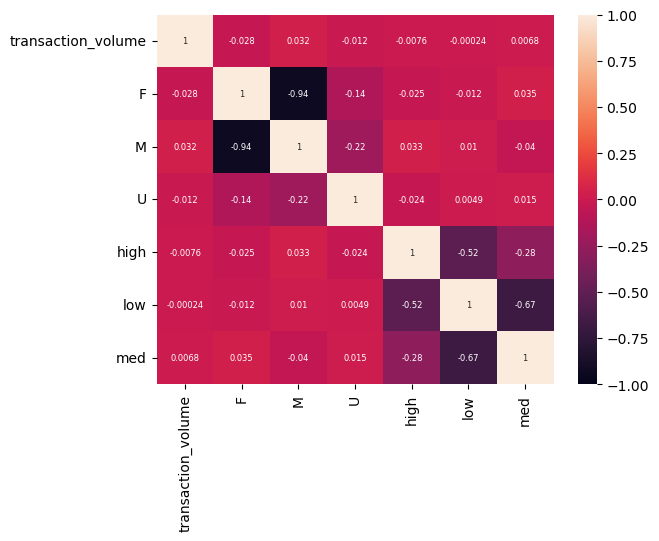

In [67]:
corr_matrix_df_new_high = df_new_high_volume.corr()
sns.heatmap(corr_matrix_df_new_high,vmin=-1, vmax=1, annot=True,annot_kws={"size": 6});

### 2.2.2. Low Transaction Volume

A similar analysis to above will be performed here, however those with low transaction volumes will be studied, to understand whether there are correlations between any of our characteristics and infrequent customers. 

In [68]:
df_customer_extra[df_customer_extra['transaction_volume'] < 10]

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie,recency,fav_product_id,transaction_volume
0,AQ00010075,U,68,0,0,0,37500,4,low,1,1,0,8,0,0,0,522.0,pdx_0008,1.0
1,AQ00010112,M,36,1,1,1,37500,3,low,2,1,0,7,1,1,0,406.0,pdx_0075,5.0
2,AQ00010221,F,42,0,0,0,22500,3,high,1,1,0,6,0,0,0,991.0,pdx_B02,2.0
3,AQ00010222,F,68,1,0,0,7500,4,low,1,1,0,9,0,1,0,630.0,pdx_0060,2.0
4,AQ0001024,M,71,0,0,0,7500,3,low,1,1,0,15,0,1,0,383.0,pdx_A33,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,ZQ00099659,M,46,0,0,0,37500,1,med,0,0,0,9,0,1,0,346.0,pdx_B02,3.0
7509,ZQ00099711,M,38,0,0,1,37500,1,low,1,1,0,4,0,1,0,535.0,pdx_0058,1.0
7510,ZQ00099869,F,41,1,0,0,22500,2,low,1,0,0,6,0,1,1,412.0,pdx_0058,4.0
7511,ZQ0009990,M,60,1,0,0,37500,3,low,1,1,0,1,0,0,1,427.0,pdx_0059,2.0


In [69]:
# We now have a list of those customers who least frequently purchase from our store
non_frequent_customers = df_customer_extra['customer_id'][df_customer_extra['transaction_volume'] < 10]
non_frequent_customers_df = df_customer_extra[df_customer_extra['transaction_volume'] < 10]

In [70]:
non_frequent_customers_df.nunique()

customer_id               6190
gender                       3
age                         58
likes_wine                   2
likes_beer                   2
likes_spirits                2
income                       5
digital                      5
social_media_usage           3
number_of_children           5
alcohol_connoisseur          2
premium_member               1
alcohol_units_per_week      24
hobby_travel                 2
hobby_watch_sports           2
hobby_foodie                 2
recency                    691
fav_product_id              80
transaction_volume          10
dtype: int64

Before moving on to the data exploration, it would be useful to understand what this group represents in terms of revenue generated, lifetime value of each customer as well as what percentage of revenue it generates.

In [71]:
print('This customer group generates: £',df_transaction_clean[df_transaction_clean['customer_id'].isin(non_frequent_customers)]['price'].sum())
print('An average (per customer): £',df_transaction_clean[df_transaction_clean['customer_id'].isin(non_frequent_customers)]['price'].sum()/len(non_frequent_customers))
print('This represents % of the total revenue:',100*df_transaction_clean[df_transaction_clean['customer_id'].isin(non_frequent_customers)]['price'].sum()/df_transaction_clean['price'].sum())


This customer group generates: £ 135936.3
An average (per customer): £ 21.960630048465266
This represents % of the total revenue: 18.153864398400156


#### 2.2.2.1. Numerical Data Exploration

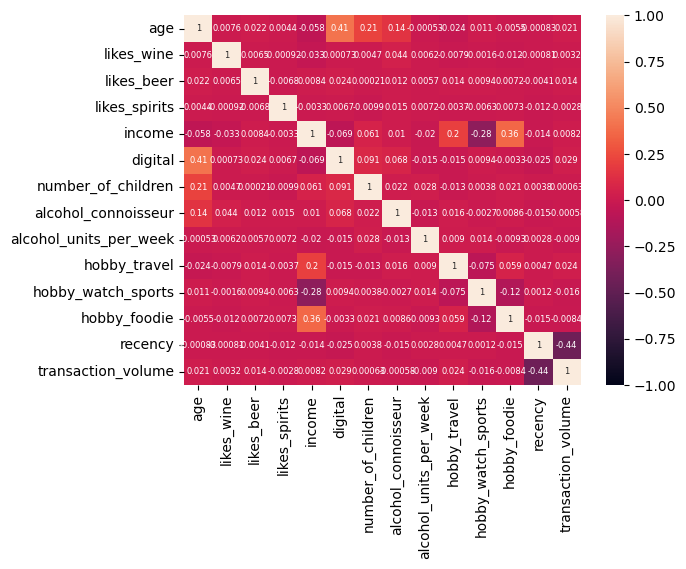

In [72]:
corr_matrix_non_frequent = non_frequent_customers_df.drop(columns=['premium_member']).corr()

sns.heatmap(corr_matrix_non_frequent,vmin=-1, vmax=1, annot=True,annot_kws={"size": 6});

Here we can see that there is an inverse correlation between recency and transaction volume. Therefore, as recency decreases transaction volume increases. Therefore, it is beneficial to focus on minimising this gap between latest purchase and today. Has our performance or reputation fallen over time? Why are this data group less likely to purchase today than they were yesterday?

Even though this is the group of low transaction volume customers, if we are able to increase the transaction volume marginally, this will be spread over a large number of customers and thus have a significant impact on revenue.

#### 2.2.2.2. Categorical Data Exploration

<AxesSubplot:title={'center':'% of occurrences of each category'}, xlabel='Category', ylabel='% of occurrences'>

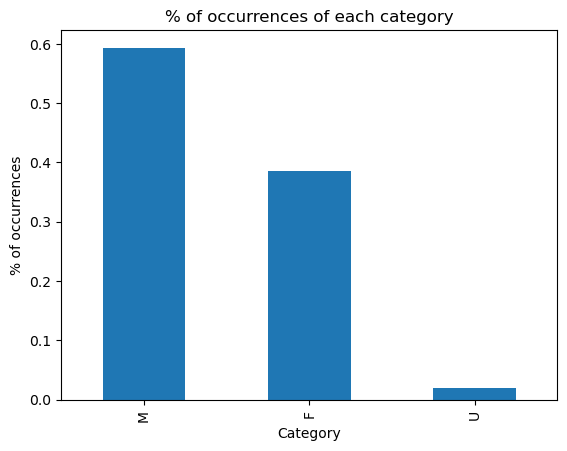

In [73]:
total_count = non_frequent_customers_df['gender'].value_counts().sum()
category_proportions = non_frequent_customers_df['gender'].value_counts() / total_count
category_proportions.plot.bar(title='% of occurrences of each category',
                                       xlabel='Category',
                                       ylabel='% of occurrences')

<AxesSubplot:title={'center':'% of occurrences of each category'}, xlabel='Category', ylabel='% of occurrences'>

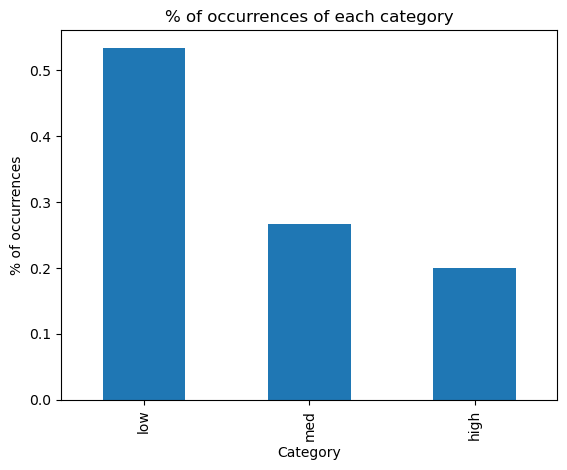

In [74]:
total_count = non_frequent_customers_df['social_media_usage'].value_counts().sum()
category_proportions = non_frequent_customers_df['social_media_usage'].value_counts() / total_count
category_proportions.plot.bar(title='% of occurrences of each category',
                                       xlabel='Category',
                                       ylabel='% of occurrences')

Here we can see a similar population breakdown to the high transaction volume customers. There is no particularly interesting insights here. 

Finally, here we will investigate which products are most purchased by this group.

In [75]:
#Total amount of purchases across all product categories produced by this group
total_purchases_non_frequent_customers = non_frequent_customers_df['fav_product_id'].value_counts().sum()

fav_product_non_frequent_customers = non_frequent_customers_df['fav_product_id'].value_counts()

# Up to a maximum of 10 products, calculate which product IDs are the favourite amongst this group
# Favourite is defined as between those products, they account for more than 75% of purchases for 
# that group. 
for i in range(1,9):
    
    print('Product ID:',fav_product_non_frequent_customers.index[i-1],
          '&&& % of Total purchases:',fav_product_non_frequent_customers[i-1]
          /total_purchases_non_frequent_customers*100)
    
    if fav_product_non_frequent_customers[0:i].sum()/total_purchases_non_frequent_customers > 0.75:
        delimitator = i
        break

indexes_non_frequent = fav_product_non_frequent_customers.index[0:delimitator]



Product ID: pdx_0061 &&& % of Total purchases: 11.174592505461266
Product ID: pdx_0063 &&& % of Total purchases: 8.452360947739876
Product ID: pdx_0062 &&& % of Total purchases: 7.175264661401445
Product ID: pdx_0060 &&& % of Total purchases: 6.351873634683248
Product ID: pdx_0057 &&& % of Total purchases: 4.200974626113259
Product ID: pdx_0059 &&& % of Total purchases: 4.0161317425642755
Product ID: pdx_0058 &&& % of Total purchases: 3.848092757519744
Product ID: pdx_0056 &&& % of Total purchases: 3.680053772475214


The maximum of 8 products has been reached accumulating under 75% of transactions. This shows a rather distributed product preference. There is no clear focal point. Nevertheless 5 out of 6 products overlap with the top 75% of the high volume transaction group. 

This shows that even though the selection of these items is not as consistent as the group above, there is an inclination towards these too.

#### 2.2.2.3. Further Categorical Analysis (Dummy Variables)

In this section we will transform the categorical variables, using dummy variables, to dive a bit deeper and explore correlations.

In [76]:
non_frequent_customers_df

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie,recency,fav_product_id,transaction_volume
0,AQ00010075,U,68,0,0,0,37500,4,low,1,1,0,8,0,0,0,522.0,pdx_0008,1.0
1,AQ00010112,M,36,1,1,1,37500,3,low,2,1,0,7,1,1,0,406.0,pdx_0075,5.0
2,AQ00010221,F,42,0,0,0,22500,3,high,1,1,0,6,0,0,0,991.0,pdx_B02,2.0
3,AQ00010222,F,68,1,0,0,7500,4,low,1,1,0,9,0,1,0,630.0,pdx_0060,2.0
4,AQ0001024,M,71,0,0,0,7500,3,low,1,1,0,15,0,1,0,383.0,pdx_A33,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,ZQ00099659,M,46,0,0,0,37500,1,med,0,0,0,9,0,1,0,346.0,pdx_B02,3.0
7509,ZQ00099711,M,38,0,0,1,37500,1,low,1,1,0,4,0,1,0,535.0,pdx_0058,1.0
7510,ZQ00099869,F,41,1,0,0,22500,2,low,1,0,0,6,0,1,1,412.0,pdx_0058,4.0
7511,ZQ0009990,M,60,1,0,0,37500,3,low,1,1,0,1,0,0,1,427.0,pdx_0059,2.0


In [77]:
df_dummies = pd.get_dummies(non_frequent_customers_df['gender'])
df_new = pd.concat([non_frequent_customers_df['transaction_volume'], df_dummies], axis=1)

df_dummies = pd.get_dummies(non_frequent_customers_df['social_media_usage'])
df_new_low_volume = pd.concat([df_new, df_dummies], axis=1)

df_new_low_volume

,transaction_volume,F,M,U,high,low,med
0,1.0,0,0,1,0,1,0
1,5.0,0,1,0,0,1,0
2,2.0,1,0,0,1,0,0
3,2.0,1,0,0,0,1,0
4,6.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
7508,3.0,0,1,0,0,0,1
7509,1.0,0,1,0,0,1,0
7510,4.0,1,0,0,0,1,0
7511,2.0,0,1,0,0,1,0


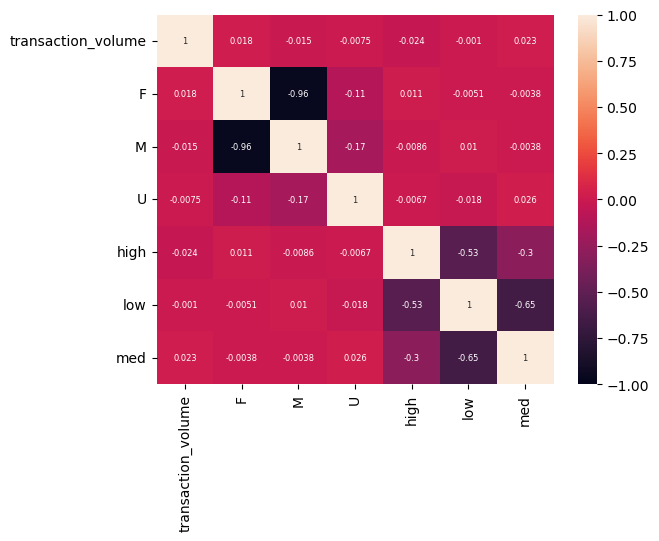

In [78]:
corr_matrix_df_new_low = df_new_low_volume.corr()
sns.heatmap(corr_matrix_df_new_low,vmin=-1, vmax=1, annot=True,annot_kws={"size": 6});

## 2.3. Transaction Value (Monetary)

### 2.3.1. High Transaction Value 

We will now explore whether there are any patterns for those who have high (overall) transaction values - not necessarily volume.

In [79]:
df_transaction_clean.groupby('customer_id')['price'].sum().sort_values()

customer_id
ZQ00022565       1.2
BQ00043226       1.2
BQ00072707       1.2
ZQ00091807       1.2
ZQ00020999       1.2
               ...  
XQ00034372     795.6
BQ00011593     803.8
ZQ00038243     817.2
BQ00027862     917.3
AQ0002380     1955.1
Name: price, Length: 7274, dtype: float64

In [80]:
# Find how much each customer has actually spent, over the time evaluated, as opposed to how many times they have shopped.
# Find frequent customers (those who shop more than 70 times)
series_values = df_transaction_clean.groupby('customer_id')['price'].sum()


#Add new column to customer table that contains the number of transactions each customer has performed
df_customer_extra = df_customer_extra.merge(series_values.rename('transaction_value',inplace=False),how='left',left_on='customer_id',right_on=series_values.index,sort=True)
df_customer_extra.sort_values(by=['transaction_value'])

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie,recency,fav_product_id,transaction_volume,transaction_value
6210,ZQ00022565,M,38,0,0,1,60000,1,med,3,0,0,11,0,0,0,1061.0,pdx_0061,1.0,1.2
2112,BQ00043226,F,65,1,0,1,7500,5,low,1,1,0,3,0,1,0,630.0,pdx_0061,1.0,1.2
2627,BQ00072707,U,60,0,0,0,97500,1,low,2,1,0,10,1,1,0,678.0,pdx_0061,1.0,1.2
7366,ZQ00091807,F,41,0,0,0,97500,1,low,4,1,0,5,1,1,0,606.0,pdx_0061,1.0,1.2
6188,ZQ00020999,F,72,0,1,1,37500,2,low,0,0,0,4,0,1,0,834.0,pdx_0061,1.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,ZQ00085426,M,73,0,0,0,22500,2,high,2,0,0,15,0,1,0,NaN,NaN,0.0,NaN
7277,ZQ00086333,F,20,1,0,0,22500,1,high,0,0,0,8,0,1,1,NaN,NaN,0.0,NaN
7310,ZQ00088439,M,18,0,0,0,22500,1,high,0,0,0,8,0,0,0,NaN,NaN,0.0,NaN
7350,ZQ00090462,F,74,1,0,0,7500,4,med,1,1,0,4,0,1,0,NaN,NaN,0.0,NaN


As above, we would also expect 239 null values (related to those customers who did not purchase anything). Let's check.

In [81]:
df_customer_extra['transaction_value'].isnull().sum()

239

This is the value expected, therefore we will fill these entries with '0' as this represents 0 purchases in the time period examined.

In [82]:
df_customer_extra['transaction_value'] = df_customer_extra['transaction_value'].fillna(0)
df_customer_extra['transaction_value'].isnull().any()

False

We will now plot spend per customer to understand whether there are any natural separation points between 

(array([5.997e+03, 1.840e+02, 1.200e+01, 1.200e+01, 5.600e+01, 2.330e+02,
        3.710e+02, 3.140e+02, 2.040e+02, 7.600e+01, 3.300e+01, 1.600e+01,
        3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.  ,   65.17,  130.34,  195.51,  260.68,  325.85,  391.02,
         456.19,  521.36,  586.53,  651.7 ,  716.87,  782.04,  847.21,
         912.38,  977.55, 1042.72, 1107.89, 1173.06, 1238.23, 1303.4 ,
        1368.57, 1433.74, 1498.91, 1564.08, 1629.25, 1694.42, 1759.59,
        1824.76, 1889.93, 1955.1 ]),
 <BarContainer object of 30 artists>)

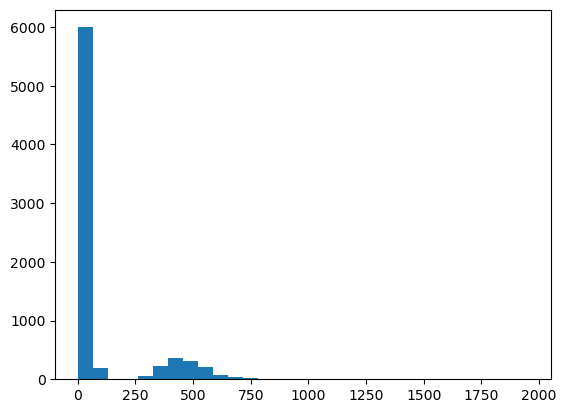

In [83]:
plt.hist(df_customer_extra['transaction_value'],bins=30)

From the above bar chart, we can see that there are clearly two groups of customers. Those who purchase high value (280 and above) and those who do not (between 0 and 75 times over that same period). We will now find out who these customers are under the `high_value_customers` variable.

In [84]:
df_customer_extra[df_customer_extra['transaction_value'] > 280]

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie,recency,fav_product_id,transaction_volume,transaction_value
24,AQ00011219,F,20,0,0,0,22500,1,high,0,0,1,16,0,1,1,350.0,pdx_0061,72.0,401.0
26,AQ00011427,F,39,0,0,0,22500,1,low,2,0,1,26,0,1,0,346.0,pdx_0063,81.0,491.7
34,AQ00012128,F,41,1,1,0,37500,2,low,1,1,1,7,0,0,0,347.0,pdx_0015,62.0,550.3
46,AQ00012561,M,44,0,0,0,22500,4,med,1,0,1,6,0,1,1,366.0,pdx_0061,68.0,362.0
54,AQ0001311,M,46,0,0,1,22500,3,low,1,1,1,19,0,0,0,349.0,pdx_0061,75.0,558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7486,ZQ0009865,F,41,0,1,1,22500,1,low,1,0,1,17,0,1,0,352.0,pdx_0063,73.0,406.1
7487,ZQ00098661,F,62,1,0,0,37500,2,low,2,0,1,17,0,1,0,363.0,pdx_0060,57.0,337.6
7497,ZQ0009925,M,50,0,0,0,60000,2,low,3,1,1,17,0,1,0,366.0,pdx_0045,62.0,488.7
7504,ZQ0009950,M,51,1,0,0,37500,1,med,0,1,1,12,0,1,1,355.0,pdx_0061,64.0,386.4


In [85]:
# We now have a list of those customers who most spend most at our store
high_value_customers = df_customer_extra['customer_id'][df_customer_extra['transaction_value'] > 280]
high_value_customers_df = df_customer_extra[df_customer_extra['transaction_value'] > 280]

In [86]:
# To check all columns have at least 2 unique values
high_value_customers_df.nunique() 

customer_id               1302
gender                       3
age                         58
likes_wine                   2
likes_beer                   2
likes_spirits                2
income                       5
digital                      5
social_media_usage           3
number_of_children           5
alcohol_connoisseur          2
premium_member               1
alcohol_units_per_week      36
hobby_travel                 2
hobby_watch_sports           2
hobby_foodie                 2
recency                     58
fav_product_id              27
transaction_volume          51
transaction_value         1085
dtype: int64

Here we are going to look into how much this customer group generates, the lifetime value of each customer as well as the percentage breakdown this represents of total revenue.

In [87]:
print('This customer group generates: £',df_transaction_clean[df_transaction_clean['customer_id'].isin(high_value_customers)]['price'].sum())
print('An average (per customer): £',df_transaction_clean[df_transaction_clean['customer_id'].isin(high_value_customers)]['price'].sum()/len(high_value_customers))
print('This represents % of the total revenue:',100*df_transaction_clean[df_transaction_clean['customer_id'].isin(high_value_customers)]['price'].sum()/df_transaction_clean['price'].sum())


This customer group generates: £ 609718.4
An average (per customer): £ 468.29370199692784
This represents % of the total revenue: 81.42597050831534


Through comparison of the the high volume (as per the current definition of 'premium customer') and the high value customers, it is clear that the high value customer is a more beneficial persona for the Wicked Beverages. Although the average revenue per customer is slightly lower, at £468 vs £471, the percentage of total revenue capture is over 3% points higher and thus catering for this slightly different persona will be beneficial. 

#### 2.3.1.1. Numerical Exploration

Let's explore whether we can identify any correlation patterns between our characteristics and those customers with high transaction value. The easiest approach here is to create a correlation heat map. As we can see from above, we only have premium members in our `high_value_customers` dataframe, therefore we will exclude this column from the correlation matrix.

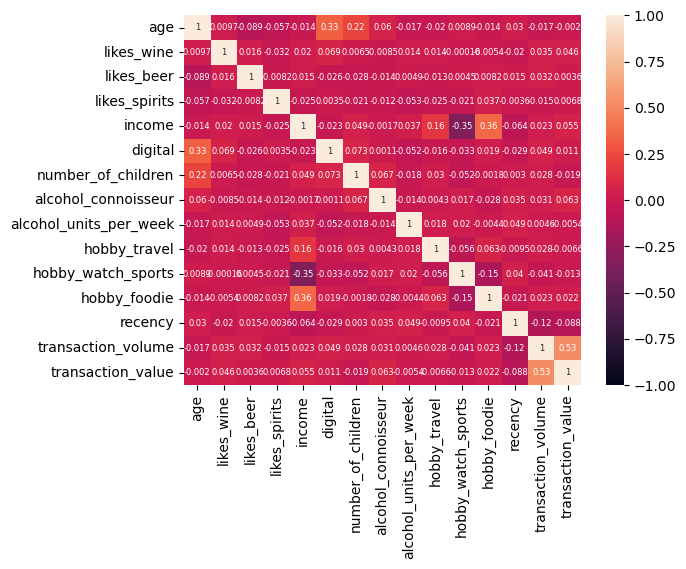

In [88]:
corr_matrix_high_value = high_value_customers_df.drop(columns=['premium_member']).corr()
sns.heatmap(corr_matrix_high_value,vmin=-1, vmax=1, annot=True,annot_kws={"size": 6});

Interestingly, transaction volume is not as strongly correlated to transactional value as one might expect. This poses the questions as to whether we should be defining premium customers as those who transact frequently. Perhaps they should be defined as those who spend more.

#### 2.3.1.2. Categorical Exploration 

<AxesSubplot:title={'center':'% of occurrences of each category'}, xlabel='Category', ylabel='% of occurrences'>

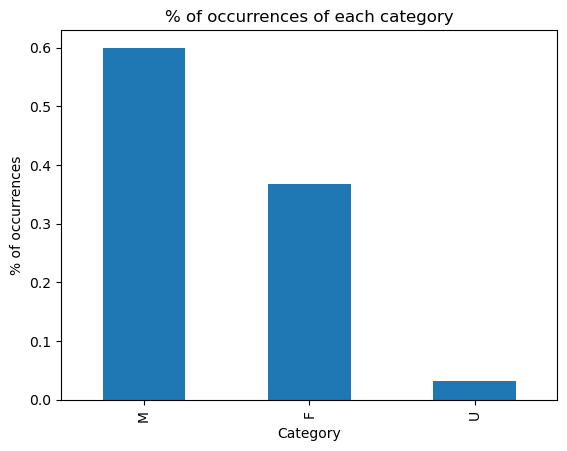

In [89]:
total_count = high_value_customers_df['gender'].value_counts().sum()
category_proportions = high_value_customers_df['gender'].value_counts() / total_count
category_proportions.plot.bar(title='% of occurrences of each category',
                                       xlabel='Category',
                                       ylabel='% of occurrences')

<AxesSubplot:title={'center':'% of occurrences of each category'}, xlabel='Category', ylabel='% of occurrences'>

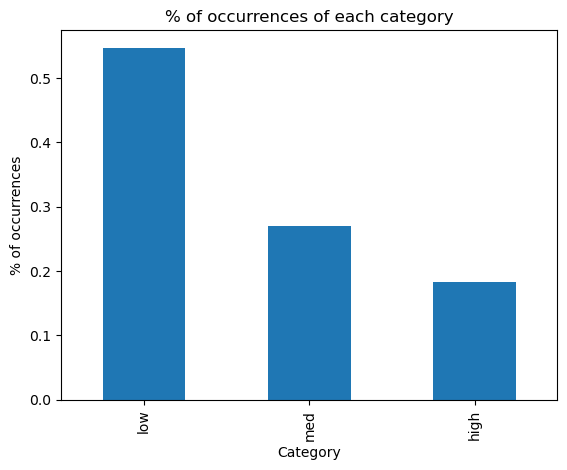

In [90]:
total_count = high_value_customers_df['social_media_usage'].value_counts().sum()
category_proportions = high_value_customers_df['social_media_usage'].value_counts() / total_count
category_proportions.plot.bar(title='% of occurrences of each category',
                                       xlabel='Category',
                                       ylabel='% of occurrences')

As in previous studies, this seems to follow the proportion of the full population, therefore nothing interesting to take from here.

Finally, here we will investigate which products are most purchased by this group.


In [91]:
#Total amount of purchases across all product categories produced by this group
total_purchases_high_value_customers = high_value_customers_df['fav_product_id'].value_counts().sum()

fav_product_high_value_customers = high_value_customers_df['fav_product_id'].value_counts()

# Up to a maximum of 8 products, calculate which product IDs are the favourite amongst this group
# Favourite is defined as between those products, they account for more than 75% of purchases for 
# that group. 
for i in range(1,9):
    
    print('Product ID:',fav_product_high_value_customers.index[i-1],
          '% of Total purchases:',fav_product_high_value_customers[i-1]
          /total_purchases_high_value_customers*100) 
    
    if fav_product_high_value_customers[0:i].sum()/total_purchases_high_value_customers > 0.75:
        delimitator = i
        break

indexes_high_value = fav_product_high_value_customers.index[0:delimitator]


Product ID: pdx_0061 % of Total purchases: 37.634408602150536
Product ID: pdx_0063 % of Total purchases: 10.368663594470046
Product ID: pdx_0060 % of Total purchases: 9.37019969278034
Product ID: pdx_0062 % of Total purchases: 8.90937019969278
Product ID: pdx_0055 % of Total purchases: 7.066052227342549
Product ID: pdx_0057 % of Total purchases: 5.22273425499232


Similarly to the high volume customers, this high value group has a clear preference as to what products they prefer.

#### 2.3.1.3. Further Categorical Analysis (Dummy Variables)

In this section we will transform the categorical variables, using dummy variables, to dive a bit deeper and explore correlations.

In [92]:
high_value_customers_df

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie,recency,fav_product_id,transaction_volume,transaction_value
24,AQ00011219,F,20,0,0,0,22500,1,high,0,0,1,16,0,1,1,350.0,pdx_0061,72.0,401.0
26,AQ00011427,F,39,0,0,0,22500,1,low,2,0,1,26,0,1,0,346.0,pdx_0063,81.0,491.7
34,AQ00012128,F,41,1,1,0,37500,2,low,1,1,1,7,0,0,0,347.0,pdx_0015,62.0,550.3
46,AQ00012561,M,44,0,0,0,22500,4,med,1,0,1,6,0,1,1,366.0,pdx_0061,68.0,362.0
54,AQ0001311,M,46,0,0,1,22500,3,low,1,1,1,19,0,0,0,349.0,pdx_0061,75.0,558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7486,ZQ0009865,F,41,0,1,1,22500,1,low,1,0,1,17,0,1,0,352.0,pdx_0063,73.0,406.1
7487,ZQ00098661,F,62,1,0,0,37500,2,low,2,0,1,17,0,1,0,363.0,pdx_0060,57.0,337.6
7497,ZQ0009925,M,50,0,0,0,60000,2,low,3,1,1,17,0,1,0,366.0,pdx_0045,62.0,488.7
7504,ZQ0009950,M,51,1,0,0,37500,1,med,0,1,1,12,0,1,1,355.0,pdx_0061,64.0,386.4


In [93]:
df_dummies = pd.get_dummies(high_value_customers_df['gender'])
df_new = pd.concat([high_value_customers_df['transaction_value'], df_dummies], axis=1)

df_dummies = pd.get_dummies(high_value_customers_df['social_media_usage'])
df_new_high_value2 = pd.concat([df_new, df_dummies], axis=1)

df_new_high_value2

,transaction_value,F,M,U,high,low,med
24,401.0,1,0,0,1,0,0
26,491.7,1,0,0,0,1,0
34,550.3,1,0,0,0,1,0
46,362.0,0,1,0,0,0,1
54,558.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
7486,406.1,1,0,0,0,1,0
7487,337.6,1,0,0,0,1,0
7497,488.7,0,1,0,0,1,0
7504,386.4,0,1,0,0,0,1


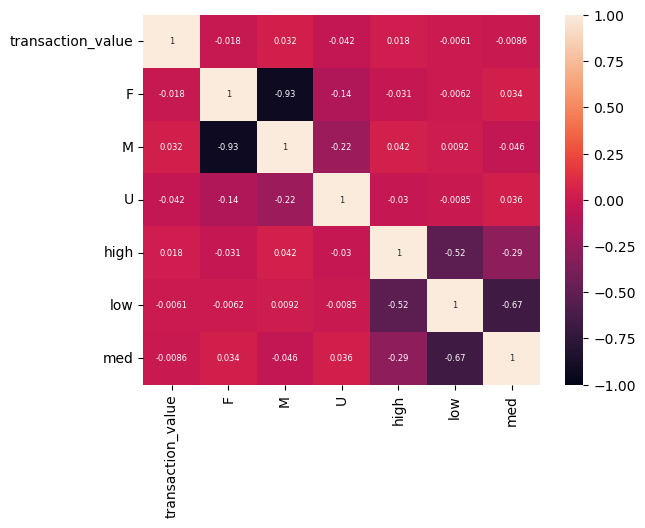

In [94]:
corr_matrix_df_new_high2 = df_new_high_value2.corr()
sns.heatmap(corr_matrix_df_new_high2,vmin=-1, vmax=1, annot=True,annot_kws={"size": 6});

No interesting correlations.

### 2.3.2. Low Transaction Value 

In [95]:
# We now have a list of those customers who most spend most at our store
low_value_customers = df_customer_extra['customer_id'][df_customer_extra['transaction_value'] < 75]
low_value_customers_df = df_customer_extra[df_customer_extra['transaction_value'] < 75]

In [96]:
# To check all columns have at least 2 unique values
low_value_customers_df.nunique() 

customer_id               6067
gender                       3
age                         58
likes_wine                   2
likes_beer                   2
likes_spirits                2
income                       5
digital                      5
social_media_usage           3
number_of_children           5
alcohol_connoisseur          2
premium_member               1
alcohol_units_per_week      24
hobby_travel                 2
hobby_watch_sports           2
hobby_foodie                 2
recency                    691
fav_product_id              78
transaction_volume          12
transaction_value          676
dtype: int64

Here we will look at how much revenue this customer group generates

In [97]:
print('This customer group generates: £',df_transaction_clean[df_transaction_clean['customer_id'].isin(low_value_customers)]['price'].sum())
print('An average (per customer): £',df_transaction_clean[df_transaction_clean['customer_id'].isin(low_value_customers)]['price'].sum()/len(low_value_customers))
print('This represents % of the total revenue:',100*df_transaction_clean[df_transaction_clean['customer_id'].isin(low_value_customers)]['price'].sum()/df_transaction_clean['price'].sum())


This customer group generates: £ 122901.5
An average (per customer): £ 20.257375968353386
This represents % of the total revenue: 16.413107943646967


#### 2.3.2.1. Numerical Exploration

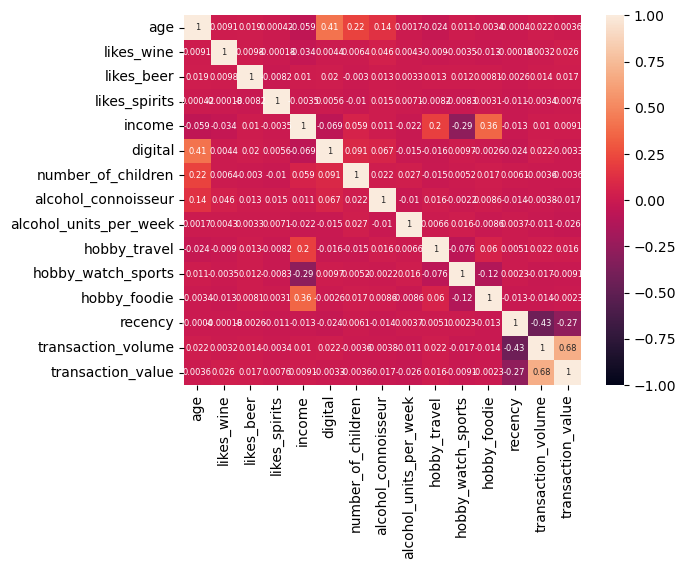

In [98]:
corr_matrix_low_value = low_value_customers_df.drop(columns=['premium_member']).corr()
sns.heatmap(corr_matrix_low_value,vmin=-1, vmax=1, annot=True,annot_kws={"size": 6});

As above, unsurprisingly, as the recency grows (i.e. the time since the last purchase grows) the transaction value goes down. Although this is not a strong correlation, this does indicate some level of relationship.

Even though these customers are not high value spenders, the number of customers is high therefore it is worth focussing on reducing that time since last purchase. Furthermore, this is an issue present amongst those high value spenders, and thus is of critical importance to understand for the success of the business.

#### 2.3.2.2. Categorical Exploration

<AxesSubplot:title={'center':'% of occurrences of each category'}, xlabel='Category', ylabel='% of occurrences'>

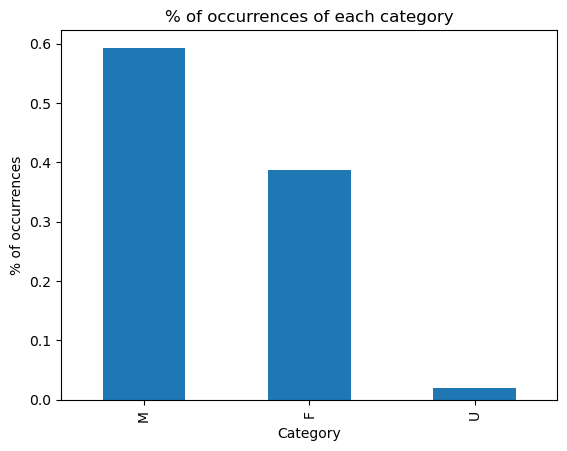

In [99]:
total_count = low_value_customers_df['gender'].value_counts().sum()
category_proportions = low_value_customers_df['gender'].value_counts() / total_count
category_proportions.plot.bar(title='% of occurrences of each category',xlabel='Category',ylabel='% of occurrences')

<AxesSubplot:title={'center':'% of occurrences of each category'}, xlabel='Category', ylabel='% of occurrences'>

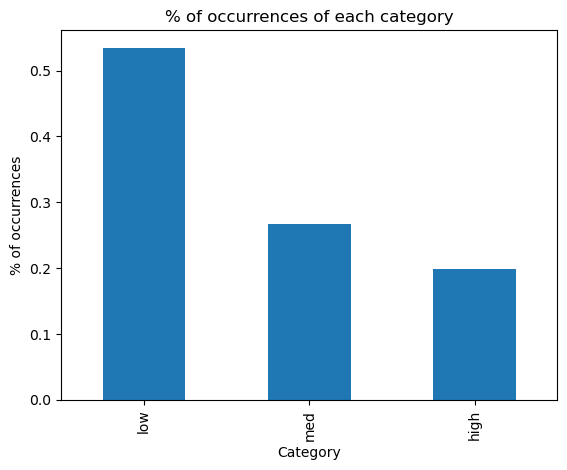

In [100]:
total_count = low_value_customers_df['social_media_usage'].value_counts().sum()
category_proportions = low_value_customers_df['social_media_usage'].value_counts() / total_count
category_proportions.plot.bar(title='% of occurrences of each category',xlabel='Category',ylabel='% of occurrences')

As above, no further information yielded from this. It is clear that neither gender nor social media impact the metrics we are interested in.

Finally, here we will investigate which products are purchased most by this group.

In [101]:
#Total amount of purchases across all product categories produced by this group
total_purchases_low_value_customers = low_value_customers_df['fav_product_id'].value_counts().sum()

fav_product_low_value_customers = low_value_customers_df['fav_product_id'].value_counts()

# Up to a maximum of 8 products, calculate which product IDs are the favourite amongst this group
# Favourite is defined as between those products, they account for more than 75% of purchases for 
# that group. 
for i in range(1,9):
    
    print('Product ID:',fav_product_low_value_customers.index[i-1],
          '% of Total purchases:',fav_product_low_value_customers[i-1]
          /total_purchases_low_value_customers*100)
    
    if fav_product_low_value_customers[0:i].sum()/total_purchases_low_value_customers > 0.75:
        delimitator = i
        break

indexes_low_value = fav_product_low_value_customers.index[0:delimitator]


Product ID: pdx_0061 % of Total purchases: 11.410432395332876
Product ID: pdx_0063 % of Total purchases: 8.613589567604667
Product ID: pdx_0062 % of Total purchases: 7.2923816060398075
Product ID: pdx_0060 % of Total purchases: 6.485929993136582
Product ID: pdx_0057 % of Total purchases: 4.272477693891559
Product ID: pdx_0059 % of Total purchases: 4.083733699382292
Product ID: pdx_0058 % of Total purchases: 3.8435140700068633
Product ID: pdx_0056 % of Total purchases: 3.689087165408373


There is a clear, marked difference between the most common products for the high frequency and/or high value clients and the non-frequent and/or low value clients.

The former group has a specific preference for a select group of products, which they buy regularly. The latter seems to be rather sporadic, with variable loyalty to any given product.

#### 2.3.2.3. Further Categorical Exploration (Dummy Variables)


In [102]:
low_value_customers_df

,customer_id,gender,age,likes_wine,likes_beer,likes_spirits,income,digital,social_media_usage,number_of_children,alcohol_connoisseur,premium_member,alcohol_units_per_week,hobby_travel,hobby_watch_sports,hobby_foodie,recency,fav_product_id,transaction_volume,transaction_value
0,AQ00010075,U,68,0,0,0,37500,4,low,1,1,0,8,0,0,0,522.0,pdx_0008,1.0,4.8
2,AQ00010221,F,42,0,0,0,22500,3,high,1,1,0,6,0,0,0,991.0,pdx_B02,2.0,15.5
3,AQ00010222,F,68,1,0,0,7500,4,low,1,1,0,9,0,1,0,630.0,pdx_0060,2.0,14.6
5,AQ00010321,F,50,0,0,1,22500,4,med,0,0,0,9,0,1,0,842.0,pdx_0057,1.0,2.0
6,AQ00010329,M,38,0,0,1,22500,1,low,3,1,0,5,1,1,0,405.0,pdx_0030,4.0,42.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,ZQ00099659,M,46,0,0,0,37500,1,med,0,0,0,9,0,1,0,346.0,pdx_B02,3.0,31.0
7509,ZQ00099711,M,38,0,0,1,37500,1,low,1,1,0,4,0,1,0,535.0,pdx_0058,1.0,2.2
7510,ZQ00099869,F,41,1,0,0,22500,2,low,1,0,0,6,0,1,1,412.0,pdx_0058,4.0,12.2
7511,ZQ0009990,M,60,1,0,0,37500,3,low,1,1,0,1,0,0,1,427.0,pdx_0059,2.0,5.0


In [103]:
df_dummies = pd.get_dummies(low_value_customers_df['gender'])
df_new = pd.concat([low_value_customers_df['transaction_value'], df_dummies], axis=1)

df_dummies = pd.get_dummies(low_value_customers_df['social_media_usage'])
df_new_low_value2 = pd.concat([df_new, df_dummies], axis=1)

df_new_low_value2

,transaction_value,F,M,U,high,low,med
0,4.8,0,0,1,0,1,0
2,15.5,1,0,0,1,0,0
3,14.6,1,0,0,0,1,0
5,2.0,1,0,0,0,0,1
6,42.9,0,1,0,0,1,0
...,...,...,...,...,...,...,...
7508,31.0,0,1,0,0,0,1
7509,2.2,0,1,0,0,1,0
7510,12.2,1,0,0,0,1,0
7511,5.0,0,1,0,0,1,0


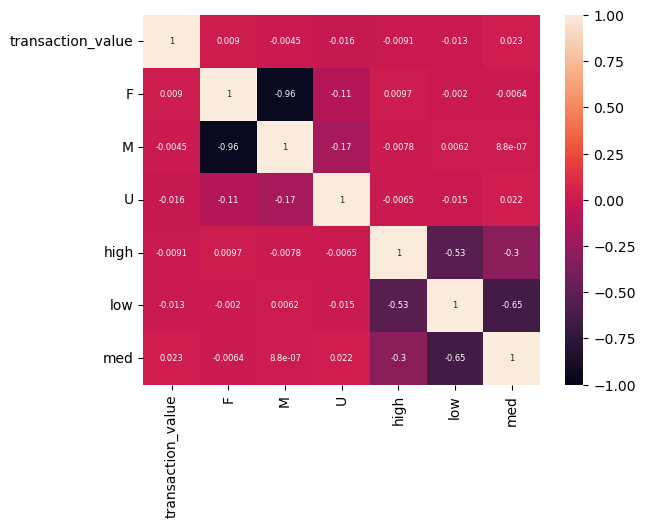

In [104]:
corr_matrix_df_new_low2 = df_new_low_value2.corr()
sns.heatmap(corr_matrix_df_new_low2,vmin=-1, vmax=1, annot=True,annot_kws={"size": 6});

From the above exploration, there is no clear correlation between the dummy variables that represent the categorical data and the transaction volume. 

# 3. Premium Members Analysis

First lets look at the full population. 

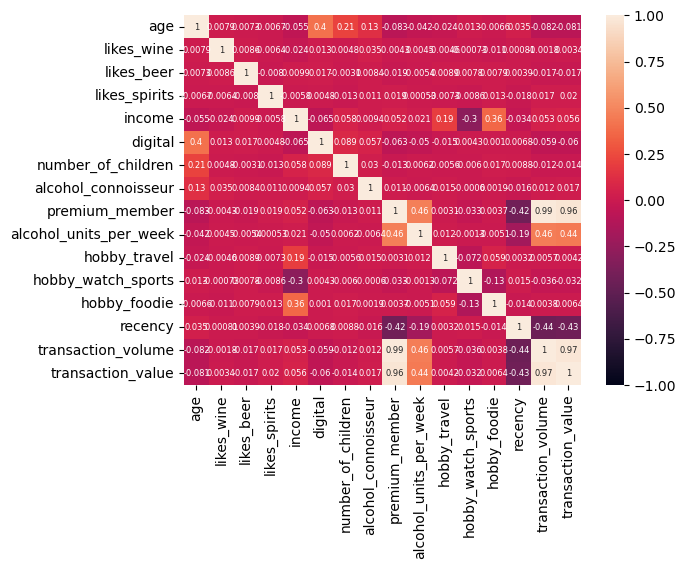

In [120]:
sns.heatmap(df_customer_extra.corr(),vmin=-1, vmax=1, annot=True,annot_kws={"size": 6});

From these we can glean a few insights. Firstly, higher consumption of alcohol is tied with a higher likelihood of being a premium member. Secondly, that both transaction volume and transaction value are very tightly correlated with being a premum member (the former slightlty more than the latter).

Premium membership is currently being defined as 'most frequent transactions', and as we can see it is very tightly correlated. It would be useful to understand what is most important to Wicked Beverages - more transactions or more revenue generated. This is important, because if it is the latter, we should aim to increase that already high (but could be higher) number that correlates `transaction_value` and `premium_member`.

Recency, interestingly, is inversely correlated to premium membership which leads me to believe something might have happened to affect the relationship between a customer being a premium vs non-premium member and purchasing. This could be anything from changes to premium payment model through to company reputation.

Based on this we should dive deeper, to understand whether these high level correlations seem sensible and whether there is any information we might have missed.

In [114]:
premium_member_df = df_customer_extra[df_customer_extra['premium_member'] == 1]
standard_member_df = df_customer_extra[df_customer_extra['premium_member'] == 0]


In [115]:
stats = pd.DataFrame()
stats['mode_premium'] = premium_member_df.drop('customer_id', axis=1).mode().T
stats['mode_standard'] = standard_member_df.drop('customer_id', axis=1).mode().T
stats['mean_premium'] = premium_member_df.mean(numeric_only=True).T
stats['mean_standard'] = standard_member_df.mean(numeric_only=True).T
stats['std_premium'] = premium_member_df.std(numeric_only=True).T
stats['std_standard'] = standard_member_df.std(numeric_only=True).T

stats

,mode_premium,mode_standard,mean_premium,mean_standard,std_premium,std_standard
gender,M,M,NaN,NaN,NaN,NaN
age,42,21,45.633867,49.249113,14.581968,16.917808
likes_wine,0,0,0.389779,0.395356,0.487886,0.488967
likes_beer,0,0,0.281465,0.304579,0.449885,0.460266
likes_spirits,0,0,0.418764,0.394550,0.493545,0.488793
income,22500,22500,33758.581236,31025.475653,20128.610168,19955.968604
digital,1,1,2.102212,2.320381,1.224528,1.317786
social_media_usage,low,low,NaN,NaN,NaN,NaN
number_of_children,1,0,1.177727,1.217188,1.091812,1.125595
alcohol_connoisseur,0,0,0.418002,0.404063,0.493419,0.490749


In [116]:
premium_member_df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1311.0,45.633867,14.581968,18.0,37.0,44.0,60.00,75.0
likes_wine,1311.0,0.389779,0.487886,0.0,0.0,0.0,1.00,1.0
likes_beer,1311.0,0.281465,0.449885,0.0,0.0,0.0,1.00,1.0
likes_spirits,1311.0,0.418764,0.493545,0.0,0.0,0.0,1.00,1.0
income,1311.0,33758.581236,20128.610168,7500.0,22500.0,22500.0,37500.00,97500.0
digital,1311.0,2.102212,1.224528,1.0,1.0,2.0,3.00,5.0
number_of_children,1311.0,1.177727,1.091812,0.0,0.0,1.0,2.00,4.0
alcohol_connoisseur,1311.0,0.418002,0.493419,0.0,0.0,0.0,1.00,1.0
premium_member,1311.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
alcohol_units_per_week,1311.0,13.276125,6.934703,0.0,8.0,12.0,18.00,37.0


From the above tables we are able to see the current characteristics of a premium member, and a brief comparison to those of standard members.

We can see that:
- Gender: Most predominantly male.
- Age: average age of 45, with a fair bit of variation 
- Drink of choice: There is no clear dominant preference, although overall the order would be spirits > wine > beer
- Income: The most common income is the £15-30k bracket, however there is a wide array of variation
- Digital: Users on the lower end of the digital spectrum (between one and two out of 5)
- Social Media Usage: Mostly low
- Children: A lot of variability, between none and two mostly. If defining a persona, would go with mode and say in general one child
- Alcohol Connoisseur: Generally no, but a fair bit of variability
- Alcohol Units per Week: Relatively light drinkers, considering range, with roughly 12 per week
- Hobbies: Keen sportsfans with small interest in food and even smaller in travel.

# 4. Final Remarks

In this analysis exercise we have explored database content that was related to Wicked Beverages

From the initial data pre-processing, we found that 29 customers did not make any purchases, and there was one product that did not exist in our product table (it has been assumed this is a one-off, Christmas purchase). We also found errors in approximately 47,000 transactions, with duplicated transaction IDs (these took place on different dates and across different customers, so were not bundle purchases).


I then explored at a high level the business performance, looking into metrics such : 
- number of customers, which seems to have slighlty dropped w.r.t 2020 values
- revenue generated and average spend which have grown slightly w.r.t 2020 values
- product popularity where we can clearly see 9 products are much more popular than the rest. Interestingly, these aren't the main revenue generators as this is spread evenly across most products.

I then conducted an RFM analysis, which showed that there were two types of customers: those who purchased frequently (55+ times) and those who didn't (between 0 and 10 times). The frequent shoppers generated over 80% of the total revenue, with an average spend of £470. Two products (pdx_0061 and pdx_0063) drove almost half of their purchases.

The non-frequent shoppers, who constituted over 80% of the customer base, only represented 18% of revenue. Their average order size was £21. Although the popular products among this group were similar to those for the frequent shoppers, there was less clear preference for specific products.

Among the non-frequent or low-value shoppers, the amount of time since their last purchase was inversely proportional to transaction volume and value. This was not an issue at all for frequent or high-value shoppers. This raises important questions about changes in pricing and potential reputational damage, amongst other potential issues.

Another study was also conducted on high-value vs. low-value customers, which showed a relatively high degree of overlap and similar results. However, it's important to ensure that the definition of "premium member" aligns with the company's goals.

I also briefly analyzed customers who were recorded as "premium" in the database. This showed a strong correlation between weekly alcohol consumption and transaction value/volume, as well as an inverse correlation between the time since their last purchase and transaction size/frequency. As mentioned before, it is important for the business to decide what kind of business they want to be. The current definition of 'premium member' is optimised for volume, however if Wicked Beverages wants to be driving value instead, then the 'premium member' definition could be slightly tweaked.

Finally, to continue this analysis it would be useful to define the desired characteristics of premium members.